In [1]:
import ROOT as rt
import csv
import re
import sys
import collections
from collections import OrderedDict
import uproot
import numpy as np
import time
import numba
from numba import jit
from matplotlib import pyplot as plt
from numpy import linalg as LA
from ROOT import TLorentzVector
from array import array

import math

# sys.path.append('/home/cms/Desktop/LLP/cms_lpc_llp/jet_timing_studies/python/lib')
# sys.path.append('/nfshome/christiw/llp/cms_lpc_llp/jet_timing_studies/python/lib')
sys.path.append('/storage/user/jmao/gpu/jmao/cms-llp/delayed_jet_analyzer/lib/')
# sys.path.append('/nfshome/christiw/llp/cms_lpc_llp/llp_analyzer/python/lib')

from histo_utilities import create_TH1D, create_TH2D, create_TGraph,std_color_list
     
import CMS_lumi, tdrstyle 
tdrstyle.setTDRStyle()
CMS_lumi.writeExtraText = 1
CMS_lumi.extraText = "     Simulation Preliminary"

# donotdelete = []
print(sys.version)

Welcome to JupyROOT 6.18/02
3.6.8 (default, Aug  7 2019, 17:28:10) 
[GCC 4.8.5 20150623 (Red Hat 4.8.5-39)]


In [2]:
directory = '/mnt/hadoop//store/group/phys_exotica/jmao/jet_timing_studies/samples_tp/qcd/'
out_dir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20190918/'
 
fname = {'analyzer-ebtp-qcd.root'}
 

tree = OrderedDict()

 

for file in fname:
#     print(directory+file)
    root_dir = uproot.open(directory+file) 
    print (directory+file)
    print ('Open ready')

    tree[file] = root_dir['L1EcalTimingAnalyzer/ecalTPTree']
    print ('Tree ready')    
#     print (tree[file],file)

/mnt/hadoop//store/group/phys_exotica/jmao/jet_timing_studies/samples_tp/qcd/analyzer-ebtp-qcd.root
Open ready
Tree ready


# Photon Energy 

i,j,n,s,m,a
analyzer-ebtp-qcd.root <TTree b'ecalTPTree' at 0x7f7110922be0>


Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190918/pho_e.png has been created


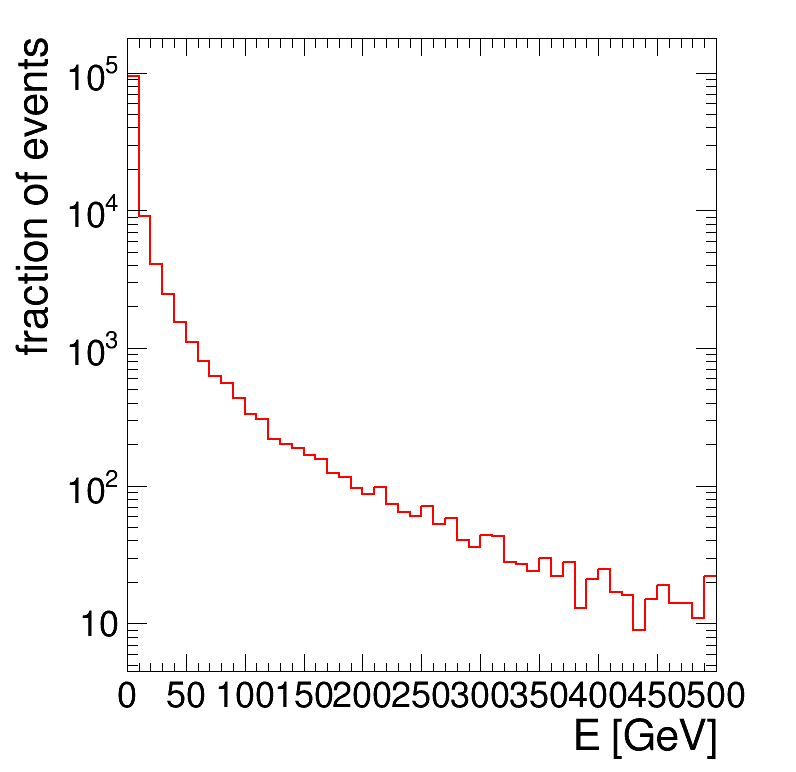

In [3]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gParticleE'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_eta = pho_eta[pho_id==22, pho_mo_id==111]
    
#     eta = pho_eta[:,0]
    eta = pho_eta.flatten()
    
    ht0 = create_TH1D( eta, axis_title=['E [GeV]', 'fraction of events'], name="", binning=[50,-0,500])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
    ht0.Draw('')
#     ht0.DrawNormalized('')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_e.png')


# Pi0 Energy

i,j,n,s,m,a
analyzer-ebtp-qcd.root <TTree b'ecalTPTree' at 0x7f7110922be0>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190918/pi0_e.png has been created


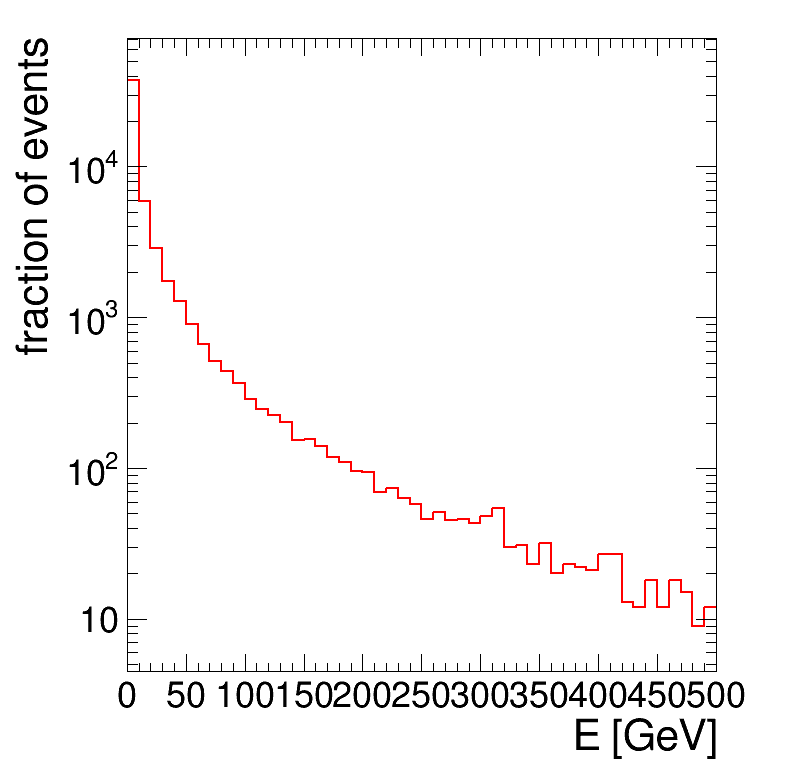

In [4]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gParticleE'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_eta = pho_eta[pho_id==111, pho_id==111]
    
#     eta = pho_eta[:,0]
    eta = pho_eta.flatten()
    
    ht0 = create_TH1D( eta, axis_title=['E [GeV]', 'fraction of events'], name="", binning=[50,-0,500])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
    ht0.Draw('')
#     ht0.DrawNormalized('')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'pi0_e.png')


# pi0 vtx 

i,j,n,s,m,a
analyzer-ebtp-qcd.root <TTree b'ecalTPTree' at 0x7f7110922be0>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190918/pi0_vtx.png has been created


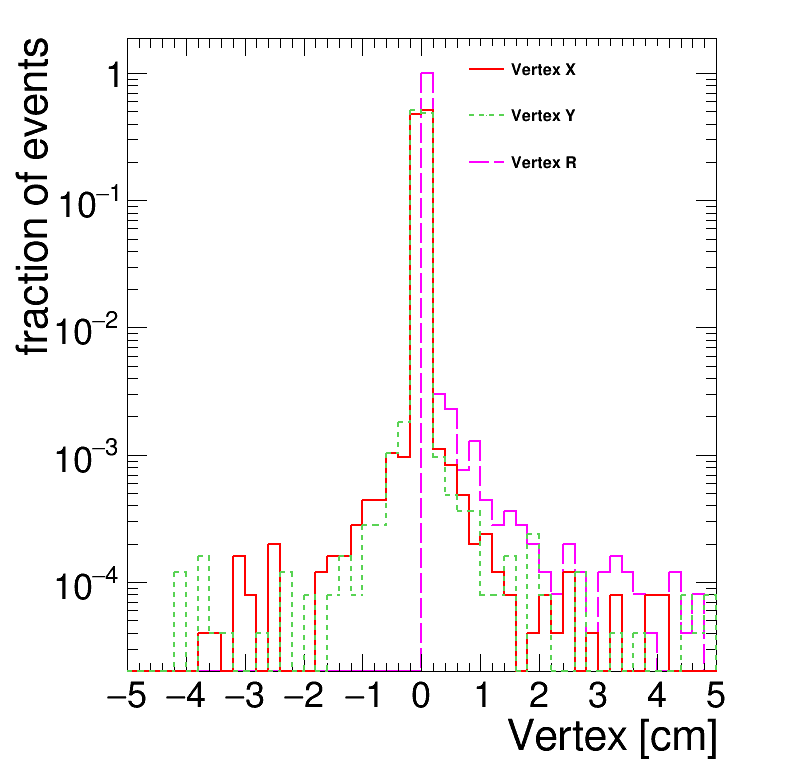

In [5]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.58,0.76,0.83,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gParticleEta'].array()
    pho_tof = v['g_tof'].array()
    pho_vx = v['gParticle_decay_vtx_x'].array()
    pho_vy = v['gParticle_decay_vtx_y'].array()
    pho_vz = v['gParticle_decay_vtx_z'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
#     pho_tof = pho_tof[pho_id==111]
    pho_tof = pho_tof[np.logical_and(pho_id==111, abs(pho_eta)<1.5)]
    pho_vx = pho_vx[np.logical_and(pho_id==111, abs(pho_eta)<1.5)]
    pho_vy = pho_vy[np.logical_and(pho_id==111, abs(pho_eta)<1.5)]
    pho_vz = pho_vz[np.logical_and(pho_id==111, abs(pho_eta)<1.5)]
    
#     eta = pho_eta[:,0]
    tof = pho_tof.flatten()
    vx = pho_vx.flatten()
    vy = pho_vy.flatten()
    vz = pho_vz.flatten()
    
    vr = [math.sqrt(x*x+y*y) for i, (x,y) in enumerate(zip(vx,vy))]
    
#     ht0 = create_TH1D( tof, axis_title=['TOF [ns]', 'fraction of events'], name="", binning=[50,-0,50])
#     ht0.SetLineColor(std_color_list[i+1])
#     ht0.SetMarkerColor(std_color_list[i+1])
    
#     ht0.Draw('')
#     ht0.DrawNormalized('')

    htr = create_TH1D( vr, axis_title=['Vertex [cm]', 'fraction of events'], name="", binning=[50,-5,5])
    htr.SetLineStyle(9)
    htr.SetLineColor(std_color_list[i+4])
    htr.SetMarkerColor(std_color_list[i+4])
    
#     htx.Draw('')
    htr.DrawNormalized('same')
 

    htx = create_TH1D( vx, axis_title=['Vertex [cm]', 'fraction of events'], name="", binning=[50,-5,5])
    htx.SetLineColor(std_color_list[i+1])
    htx.SetMarkerColor(std_color_list[i+1])
    
#     htx.Draw('')
    htx.DrawNormalized('same')
    
    
    hty = create_TH1D( vy, axis_title=['Vertex [cm]', 'fraction of events'], name="", binning=[50,-5,5])
    hty.SetLineStyle(7)
    hty.SetLineColor(std_color_list[i+3])
    hty.SetMarkerColor(std_color_list[i+3])
    
#     htx.Draw('')
    hty.DrawNormalized('same')
    


    htz = create_TH1D( vz, axis_title=['Vertex [cm]', 'fraction of events'], name="", binning=[50,-5,5])
    htz.SetLineColor(std_color_list[i+2])
    htz.SetMarkerColor(std_color_list[i+2])
    
#     htz.Draw('')
#     htz.DrawNormalized('same')

    
    leg.AddEntry(htx,'Vertex X')
    leg.AddEntry(hty,'Vertex Y')
    leg.AddEntry(htr,'Vertex R')
#     leg.AddEntry(htz,'Vertex Z')
    
    
    i += 1

leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'pi0_vtx.png')


# Pi0 TOF

i,j,n,s,m,a
analyzer-ebtp-qcd.root <TTree b'ecalTPTree' at 0x7f7110922be0>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190918/pi0_tof.png has been created


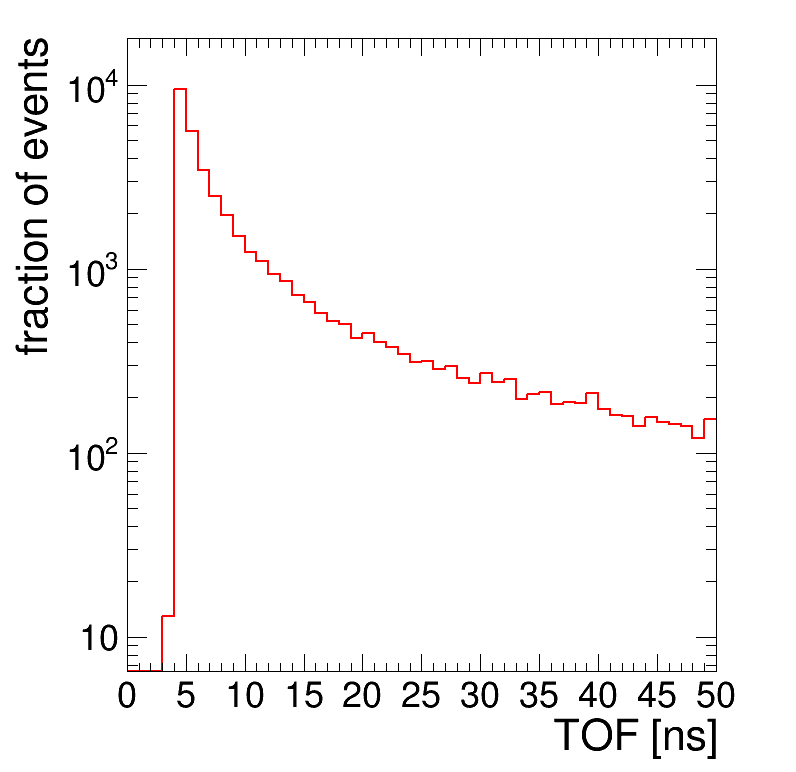

In [6]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gParticleEta'].array()
    pho_tof = v['g_tof'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_tof = pho_tof[pho_id==111]
#     pho_tof = pho_tof[np.logical_and(pho_id==111, abs(pho_eta)<1.5)]
    
#     eta = pho_eta[:,0]
    tof = pho_tof.flatten()
    
    ht0 = create_TH1D( tof, axis_title=['TOF [ns]', 'fraction of events'], name="", binning=[50,-0,50])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
    ht0.Draw('')
#     ht0.DrawNormalized('')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'pi0_tof.png')


i,j,n,s,m,a
analyzer-ebtp-qcd.root <TTree b'ecalTPTree' at 0x7f7110922be0>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190918/pho_tof.png has been created


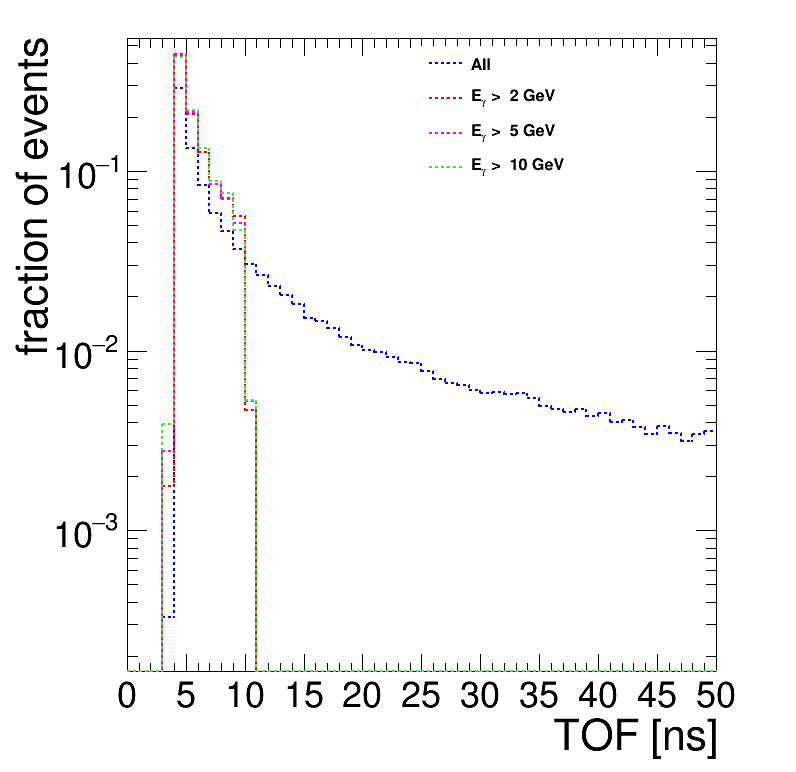

In [7]:
c = rt.TCanvas('c','c', 800, 800)
c.SetRightMargin(0.1)
leg = rt.TLegend(0.78,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_e = v['gParticleE'].array()
    pho_eta = v['gParticleEta'].array()
    pho_pz = v['g_tof'].array()
    pho_mo_pz = v['g_tof'].array()
#     pho_mo_pz = v['gParticleMotherDR'].array()
#     pho_id = v['gParticleSiblingId'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_basic1_str = np.logical_and(pho_id==22, pho_mo_id==111)
    pho_basic_str = np.logical_and(pho_basic1_str, abs(pho_eta)<1.5)

    pho_e2_str = np.logical_and(pho_basic_str, pho_e> 2)
    pho_e5_str = np.logical_and(pho_basic_str, pho_e> 5)
    pho_e10_str = np.logical_and(pho_basic_str, pho_e> 10)
    pho_e20_str = np.logical_and(pho_basic_str, pho_e> 20)
    
    pho_pz = pho_pz[np.logical_and(pho_id==22, pho_mo_id==111)]
    pho_mo_pz0 = pho_mo_pz[np.logical_and(pho_id==22, pho_mo_id==111)]
    
    pho_mo_pz2 = pho_mo_pz[pho_e2_str]
    pho_mo_pz5 = pho_mo_pz[pho_e5_str]
    pho_mo_pz10 = pho_mo_pz[pho_e10_str]
    pho_mo_pz20 = pho_mo_pz[pho_e20_str]
    
#     e = pho_e[:,0]
    pz = pho_pz.flatten()
    mo_pz = pho_mo_pz0.flatten()
    mo_pz2 = pho_mo_pz2.flatten()
    mo_pz5 = pho_mo_pz5.flatten()
    mo_pz10 = pho_mo_pz10.flatten()
    mo_pz20 = pho_mo_pz20.flatten()
    
    
    ht1 = create_TH1D( mo_pz, axis_title=['TOF [ns]', 'fraction of events'], name="", binning=[50,-0,50])
    ht1.SetLineStyle(2)
    ht1.SetLineColor(std_color_list[i+2])
    ht1.SetMarkerColor(std_color_list[i+2])

    ht12 = create_TH1D( mo_pz2, axis_title=['TOF [ns]', 'fraction of events'], name="", binning=[50,-0,50])
    ht12.SetLineStyle(2)
    ht12.SetLineColor(std_color_list[i+1])
    ht12.SetMarkerColor(std_color_list[i+1])
    
    ht15 = create_TH1D( mo_pz5, axis_title=['TOF [ns]', 'fraction of events'], name="", binning=[50,-0,50])
    ht15.SetLineStyle(2)
    ht15.SetLineColor(std_color_list[i+4])
    ht15.SetMarkerColor(std_color_list[i+4])
    
    
    ht110 = create_TH1D( mo_pz10, axis_title=['TOF [ns]', 'fraction of events'], name="", binning=[50,-0,50])
    ht110.SetLineStyle(2)
    ht110.SetLineColor(std_color_list[i+3])
    ht110.SetMarkerColor(std_color_list[i+3])
    
    ht120 = create_TH1D( mo_pz10, axis_title=['TOF [ns]', 'fraction of events'], name="", binning=[50,-0,50])
    ht120.SetLineStyle(2)
    ht120.SetLineColor(std_color_list[i+5])
    ht120.SetMarkerColor(std_color_list[i+5])
  
    
#     ht1.Draw('same')
#     ht12.Draw('same')
#     ht15.Draw('same')
#     ht110.Draw('same')
#     ht120.Draw('same')

    ht1.DrawNormalized('same')
    ht12.DrawNormalized('same')
    ht15.DrawNormalized('same')
    ht110.DrawNormalized('same')


 
    leg.AddEntry(ht1, 'All')
    leg.AddEntry(ht12, 'E_{#gamma} >  2 GeV')
    leg.AddEntry(ht15, 'E_{#gamma} >  5 GeV')
    leg.AddEntry(ht110, 'E_{#gamma} >  10 GeV')
#     leg.AddEntry(ht120, 'DeltaR(#gamma, #pi^{0}), E_{#pi^{0}} >  20 GeV')
 
    i += 1

leg.Draw()

c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_tof.png')

i,j,n,s,m,a
analyzer-ebtp-qcd.root <TTree b'ecalTPTree' at 0x7f7110922be0>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190918/pi0_tof.png has been created


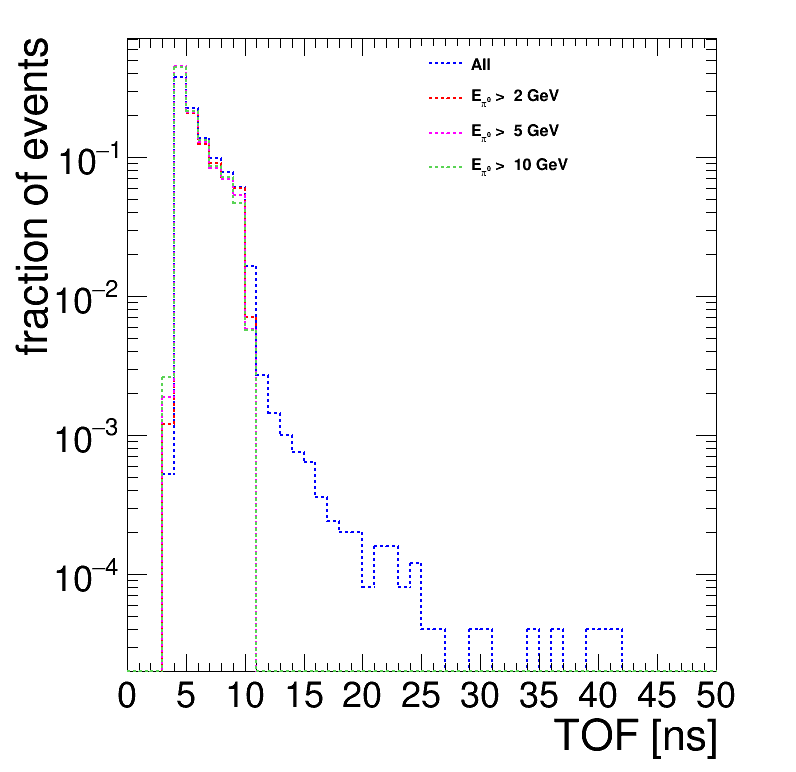

In [8]:
c = rt.TCanvas('c','c', 800, 800)
c.SetRightMargin(0.1)
leg = rt.TLegend(0.78,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_e = v['gParticleE'].array()
    pho_eta = v['gParticleEta'].array()
    pho_pz = v['g_tof'].array()
    pho_mo_pz = v['g_tof'].array()
#     pho_mo_pz = v['gParticleMotherDR'].array()
#     pho_id = v['gParticleSiblingId'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_basic_str = np.logical_and(pho_id==111, abs(pho_eta)<1.5)
    pho_e2_str = np.logical_and(pho_basic_str, pho_e> 2)
    pho_e5_str = np.logical_and(pho_basic_str, pho_e> 5)
    pho_e10_str = np.logical_and(pho_basic_str, pho_e> 10)
    pho_e20_str = np.logical_and(pho_basic_str, pho_e> 20)
    
 
    pho_mo_pz0 = pho_mo_pz[pho_basic_str]
    
    pho_mo_pz2 = pho_mo_pz[pho_e2_str]
    pho_mo_pz5 = pho_mo_pz[pho_e5_str]
    pho_mo_pz10 = pho_mo_pz[pho_e10_str]
    pho_mo_pz20 = pho_mo_pz[pho_e20_str]
    
#     e = pho_e[:,0]
    pz = pho_pz.flatten()
    mo_pz = pho_mo_pz0.flatten()
    mo_pz2 = pho_mo_pz2.flatten()
    mo_pz5 = pho_mo_pz5.flatten()
    mo_pz10 = pho_mo_pz10.flatten()
    mo_pz20 = pho_mo_pz20.flatten()
    
    
    ht1 = create_TH1D( mo_pz, axis_title=['TOF [ns]', 'fraction of events'], name="", binning=[50,-0,50])
    ht1.SetLineStyle(2)
    ht1.SetLineColor(std_color_list[i+2])
    ht1.SetMarkerColor(std_color_list[i+2])

    ht12 = create_TH1D( mo_pz2, axis_title=['TOF [ns]', 'fraction of events'], name="", binning=[50,-0,50])
    ht12.SetLineStyle(2)
    ht12.SetLineColor(std_color_list[i+1])
    ht12.SetMarkerColor(std_color_list[i+1])
    
    ht15 = create_TH1D( mo_pz5, axis_title=['TOF [ns]', 'fraction of events'], name="", binning=[50,-0,50])
    ht15.SetLineStyle(2)
    ht15.SetLineColor(std_color_list[i+4])
    ht15.SetMarkerColor(std_color_list[i+4])
    
    
    ht110 = create_TH1D( mo_pz10, axis_title=['TOF [ns]', 'fraction of events'], name="", binning=[50,-0,50])
    ht110.SetLineStyle(2)
    ht110.SetLineColor(std_color_list[i+3])
    ht110.SetMarkerColor(std_color_list[i+3])
    
    ht120 = create_TH1D( mo_pz10, axis_title=['TOF [ns]', 'fraction of events'], name="", binning=[50,-0,50])
    ht120.SetLineStyle(2)
    ht120.SetLineColor(std_color_list[i+5])
    ht120.SetMarkerColor(std_color_list[i+5])
  
    
#     ht1.Draw('same')
#     ht12.Draw('same')
#     ht15.Draw('same')
#     ht110.Draw('same')
#     ht120.Draw('same')

    ht1.DrawNormalized('same')
    ht12.DrawNormalized('same')
    ht15.DrawNormalized('same')
    ht110.DrawNormalized('same')


 
    leg.AddEntry(ht1, 'All')
    leg.AddEntry(ht12, 'E_{#pi^{0}} >  2 GeV')
    leg.AddEntry(ht15, 'E_{#pi^{0}} >  5 GeV')
    leg.AddEntry(ht110, 'E_{#pi^{0}} >  10 GeV')
#     leg.AddEntry(ht120, 'DeltaR(#gamma, #pi^{0}), E_{#pi^{0}} >  20 GeV')
 
    i += 1

leg.Draw()

c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pi0_tof.png')

i,j,n,s,m,a
analyzer-ebtp-qcd.root <TTree b'ecalTPTree' at 0x7f7110922be0>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190918/pi0_tof_in_eb.png has been created


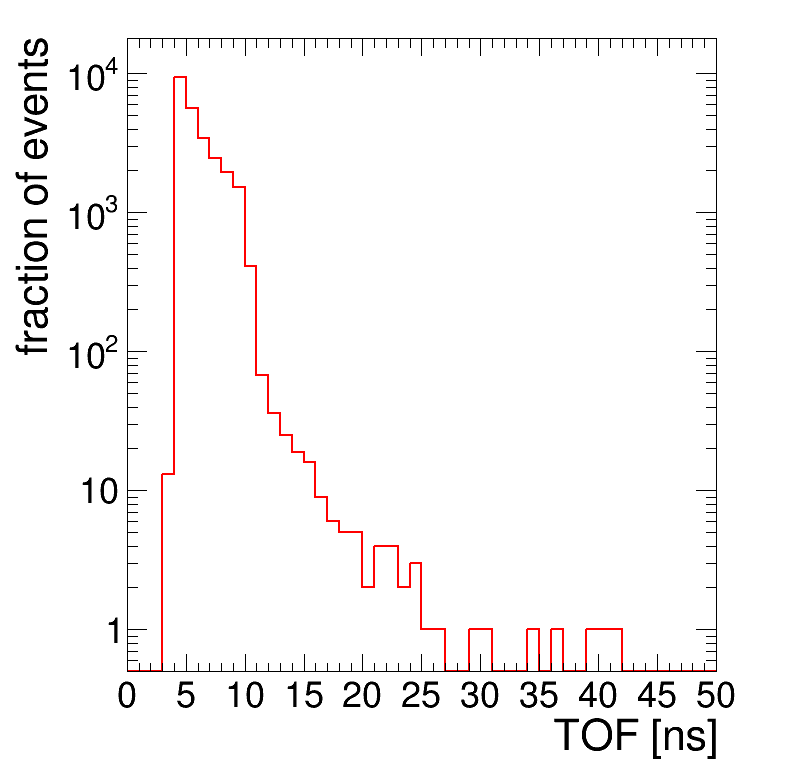

In [9]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gParticleEta'].array()
    pho_tof = v['g_tof'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
#     pho_tof = pho_tof[pho_id==111]
    pho_tof = pho_tof[np.logical_and(pho_id==111, abs(pho_eta)<1.5)]
    
#     eta = pho_eta[:,0]
    tof = pho_tof.flatten()
    
    ht0 = create_TH1D( tof, axis_title=['TOF [ns]', 'fraction of events'], name="", binning=[50,-0,50])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
    ht0.Draw('')
#     ht0.DrawNormalized('')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'pi0_tof_in_eb.png')


# Energy spectrum

i,j,n,s,m,a
analyzer-ebtp-qcd.root <TTree b'ecalTPTree' at 0x7f7110922be0>


/usr/local/lib/python3.6/site-packages/awkward/array/jagged.py:1031: RuntimeWarning: invalid value encountered in greater
  result = getattr(ufunc, method)(*inputs, **kwargs)
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190918/pi0_e97.png has been created


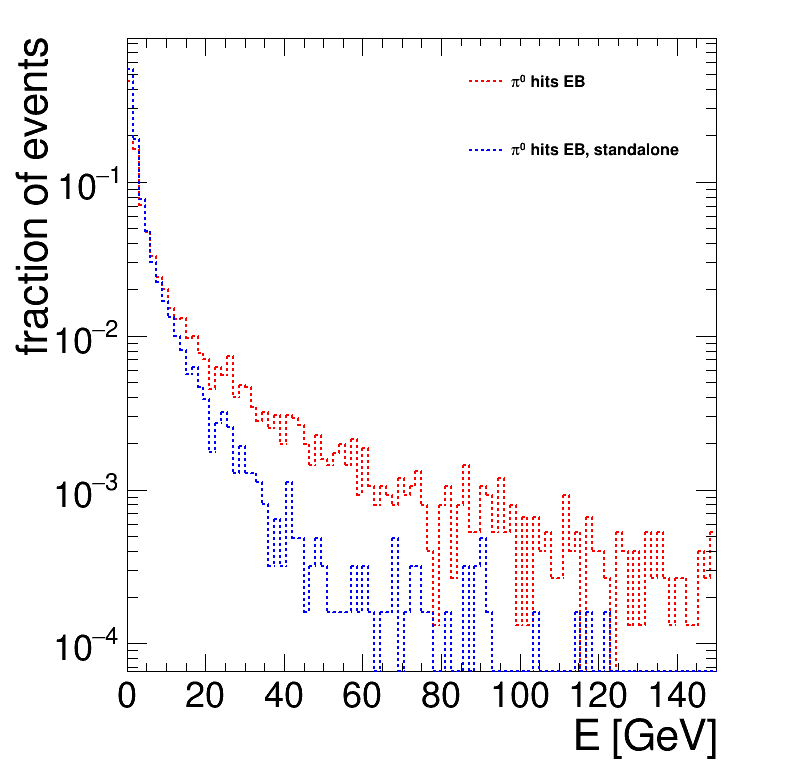

In [14]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.58,0.76,0.83,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gParticleEta'].array()
    pho_e = v['gParticleE'].array()
    pho_t = v['g_tof'].array()
    pho_tm = v['g_t_mindr'].array()
    pho_id = v['gParticleId'].array()
#     pho_mo_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_pair_basic_string = np.logical_and(pho_id==111, abs(pho_eta)<1.5)
    pho_mo1_string = np.logical_and(abs(pho_mo_id)>=1, abs(pho_mo_id)<=6)
    pho_mo2_string = np.logical_and(abs(pho_mo_id)==21, abs(pho_mo_id)>0)
    pho_mo_string = np.logical_or(pho_mo1_string, pho_mo2_string)
    pho_f_string = np.logical_and(pho_pair_basic_string, pho_mo_string)
    pho_alone_string = np.logical_and(pho_t>0,pho_tm==0)
    pho_f1_string = np.logical_and(pho_f_string, pho_alone_string)
    
    pho_e1 = pho_e[pho_f_string]
    pho_e2 = pho_e[pho_f1_string]
    
#     eta = pho_eta[:,0]
    e1 = pho_e1.flatten()
    e2 = pho_e2.flatten()
    
    ht0 = create_TH1D( e1, axis_title=['E [GeV]', 'fraction of events'], name="", binning=[100,-0,150])
    ht0.SetLineStyle(2)
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
    ht1 = create_TH1D( e2, axis_title=['E [GeV]', 'fraction of events'], name="", binning=[100,-0,150])
    ht1.SetLineStyle(2)
    ht1.SetLineColor(std_color_list[i+2])
    ht1.SetMarkerColor(std_color_list[i+2])
    
#     ht0.Draw('same')
#     ht1.Draw('same')
    ht0.DrawNormalized('same')
    ht1.DrawNormalized('same')

    leg.AddEntry(ht0, '#pi^{0} hits EB ')
    leg.AddEntry(ht1, '#pi^{0} hits EB, standalone ')
 
    i += 1

leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'pi0_e97.png')


i,j,n,s,m,a
analyzer-ebtp-qcd.root <TTree b'ecalTPTree' at 0x7f7110922be0>
tof [5.1844425 4.893134  7.7820296 8.073436  4.8183312 5.2278857 8.023872
 8.003964  5.291663  4.8599896 8.150461  8.177229 ]
tmax [5.2931    4.916183  8.177229  8.177229  4.893134  5.5208354 8.177229
 8.177229  5.336655  4.893134  8.177229  8.177229 ]
tmin [5.1844425 4.8183312 7.7820296 7.7820296 4.8183312 5.1844425 7.7820296
 7.7820296 5.0996666 4.8183312 7.7820296 7.7820296]
dt [ 0.01396561  0.00715971  0.03850889 -0.00660706  0.03830242  0.00518131
  0.01509619  0.03808594  0.03821325  0.01693583  0.00635862  0.03936672
  0.03931713]
 FCN=149.454 FROM MIGRAD    STATUS=CONVERGED      70 CALLS          71 TOTAL
                     EDM=1.63928e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.06028e+03   1.58205e+01   7.90353e-02  -1.45772e-05
   2  M

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190918/pi0_gen_time_1.png has been created


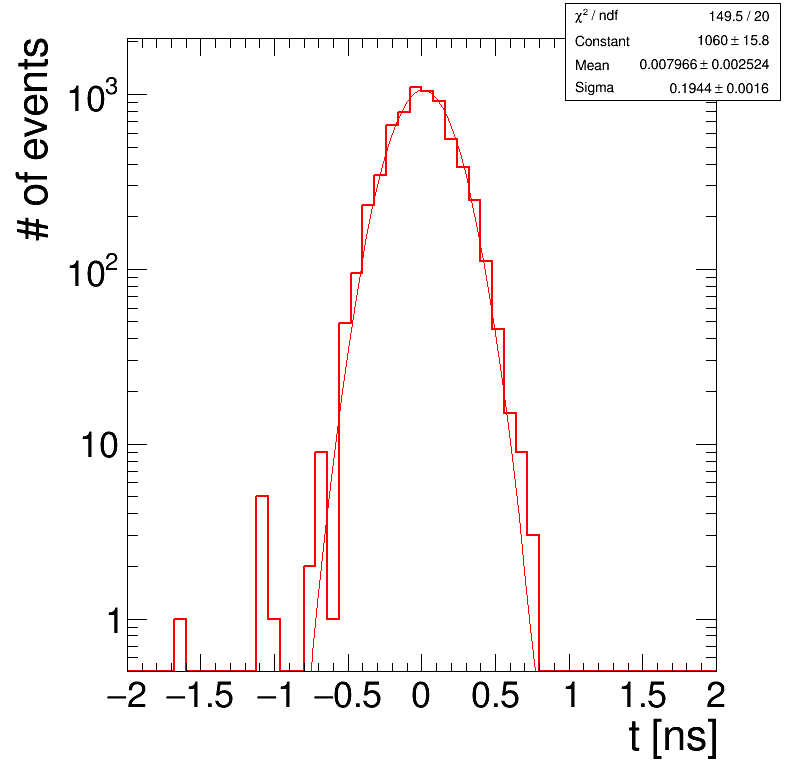

In [15]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gParticleEta'].array()
    pho_tof = v['g_tof'].array()
#     pho_dt = v['g_dt_sc_01'].array()
    pho_dt = v['gen_time'].array()
#     pho_dt = v['gen_time_max_01'].array()
    cnt = v['g_cnt_sc_01'].array()
    pho_tmax = v['g_tmax_sc_01'].array()
    pho_tmin = v['g_tmin_sc_01'].array()
    pho_e = v['gParticleE'].array()
    pho_emax1 = v['gEmax_01'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
#     for ii,x in enumerate(pho_tmax):
#         for j,y in enumerate(x):
#             if(y==1000):
#                 pho_tma[ii][j] = 0.
    
    pho_pair_basic_string = np.logical_and(pho_id==111, abs(pho_eta)<1.4)
    pho_pair_basic_emax_string = np.logical_and(pho_pair_basic_string, pho_emax1>0)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_emax2>0)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_e>5)
    pho_pair_f1_string = np.logical_and(pho_pair_basic_string, pho_e>5)
    pho_time_equal_string = np.logical_and(pho_tmax==pho_tmin, pho_tmin==pho_tof)
    pho_time_not_equal_string = np.logical_not(pho_time_equal_string )
    pho_time_not_equal_string = np.logical_and(cnt>1, 1 )
#     pho_pair_f_string = np.logical_and(pho_pair_basic_string, 1)
    pho_pair_f_string = np.logical_and(pho_pair_f1_string, pho_time_not_equal_string)
    
    pho_tof = pho_tof[pho_pair_f_string]
    pho_dt = pho_dt[pho_pair_f1_string]
    pho_tmax = pho_tmax[pho_pair_f_string]
    pho_tmin = pho_tmin[pho_pair_f_string]
    
    print('tof',pho_tof[1])
    print('tmax',pho_tmax[1])
    print('tmin',pho_tmin[1])
    print('dt',pho_dt[1])
#     eta = pho_eta[:,0]
    tof = pho_tof.flatten()
    tmax = pho_tmax.flatten()
    tmin = pho_tmin.flatten()
    dt = pho_dt.flatten()
#     dt = tmax-tmin
#     dt = tmax-tof
#     dt = tmin-tof
    
    ht0 = create_TH1D( dt, axis_title=['t [ns]', '# of events'], name="", binning=[50,-2,2])
#     ht0 = create_TH1D( dt, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[50,-2,2])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
#     ht0.Draw('')
    ht0.DrawNormalized('')
    ht0.Fit('gaus')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'pi0_gen_time_1.png')
# c.SaveAs(out_dir+'pi0_tof_same_direction.png')


i,j,n,s,m,a
analyzer-ebtp-qcd.root <TTree b'ecalTPTree' at 0x7f7110922be0>
tof [5.1844425 4.893134  7.7820296 8.073436  4.8183312 5.2278857 8.023872
 8.003964  5.291663  4.8599896 8.150461  8.177229 ]
tmax [5.2931    4.916183  8.177229  8.177229  4.893134  5.5208354 8.177229
 8.177229  5.336655  4.893134  8.177229  8.177229 ]
tmin [5.1844425 4.8183312 7.7820296 7.7820296 4.8183312 5.1844425 7.7820296
 7.7820296 5.0996666 4.8183312 7.7820296 7.7820296]
dt [-2.4971259 -2.4971259 -2.4971259 -2.4971259 -2.4971259 -2.4971259
 -2.4971259 -2.4971259 -2.4971259 -2.4971259 -2.4971259 -2.4971259
 -2.4971259]
 FCN=347.314 FROM MIGRAD    STATUS=CONVERGED      67 CALLS          68 TOTAL
                     EDM=2.1818e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     4.64005e+02   7.29101e+00   5.34633e-02  -8.41674e-05
   2  Mean         2.

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190918/pi0_prod_vz.png has been created


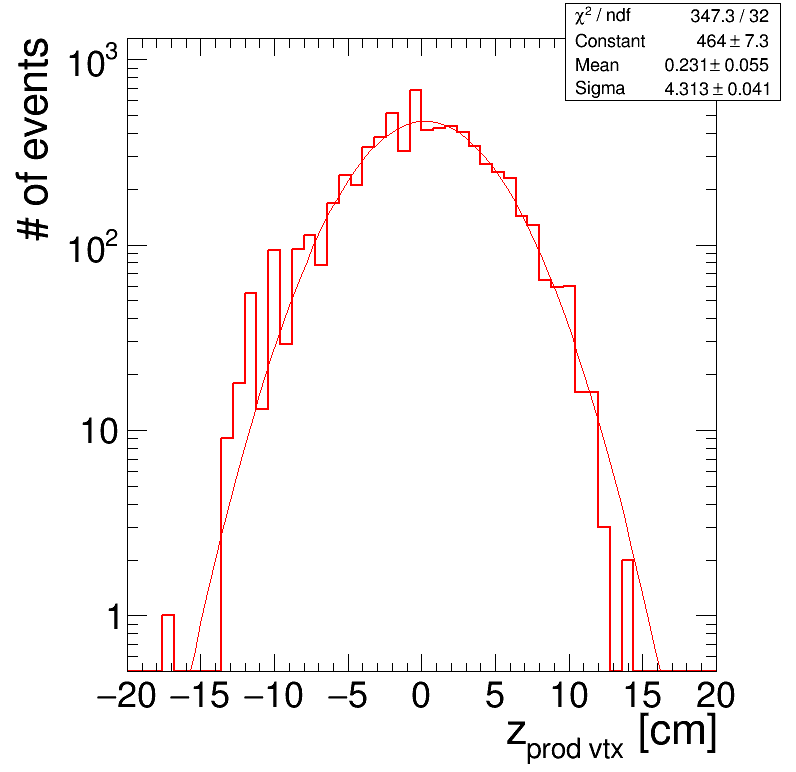

In [16]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gParticleEta'].array()
    pho_tof = v['g_tof'].array()
#     pho_dt = v['g_dt_sc_01'].array()
    pho_dt = v['gParticle_prod_vtx_z'].array()
#     pho_dt = v['gen_time_max_01'].array()
    cnt = v['g_cnt_sc_01'].array()
    pho_tmax = v['g_tmax_sc_01'].array()
    pho_tmin = v['g_tmin_sc_01'].array()
    pho_e = v['gParticleE'].array()
    pho_emax1 = v['gEmax_01'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
#     for ii,x in enumerate(pho_tmax):
#         for j,y in enumerate(x):
#             if(y==1000):
#                 pho_tma[ii][j] = 0.
    
    pho_pair_basic_string = np.logical_and(pho_id==111, abs(pho_eta)<1.4)
    pho_pair_basic_emax_string = np.logical_and(pho_pair_basic_string, pho_emax1>0)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_emax2>0)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_e>5)
    pho_pair_f1_string = np.logical_and(pho_pair_basic_string, pho_e>5)
    pho_time_equal_string = np.logical_and(pho_tmax==pho_tmin, pho_tmin==pho_tof)
    pho_time_not_equal_string = np.logical_not(pho_time_equal_string )
    pho_time_not_equal_string = np.logical_and(cnt>1, 1 )
#     pho_pair_f_string = np.logical_and(pho_pair_basic_string, 1)
    pho_pair_f_string = np.logical_and(pho_pair_f1_string, pho_time_not_equal_string)
    
    pho_tof = pho_tof[pho_pair_f_string]
    pho_dt = pho_dt[pho_pair_f1_string]
    pho_tmax = pho_tmax[pho_pair_f_string]
    pho_tmin = pho_tmin[pho_pair_f_string]
    
    print('tof',pho_tof[1])
    print('tmax',pho_tmax[1])
    print('tmin',pho_tmin[1])
    print('dt',pho_dt[1])
#     eta = pho_eta[:,0]
    tof = pho_tof.flatten()
    tmax = pho_tmax.flatten()
    tmin = pho_tmin.flatten()
    dt = pho_dt.flatten()
#     dt = tmax-tmin
#     dt = tmax-tof
#     dt = tmin-tof
    
    ht0 = create_TH1D( dt, axis_title=['z_{prod vtx} [cm]', '# of events'], name="", binning=[50,-20,20])
#     ht0 = create_TH1D( dt, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[50,-2,2])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
#     ht0.Draw('')
    ht0.DrawNormalized('')
    ht0.Fit('gaus')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'pi0_prod_vz.png')
# c.SaveAs(out_dir+'pi0_tof_same_direction.png')


i,j,n,s,m,a
analyzer-ebtp-qcd.root <TTree b'ecalTPTree' at 0x7f7110922be0>
dt [-0.13229227 -0.11944675 -0.1320796  -0.1145997  -0.15517807 -0.13214827
 -0.12382603 -0.14019251 -0.09949017 -0.12175989 -0.12049246 -0.12170219
 -0.1070261  -0.10345602 -0.09812975]
dt flat -0.13229227 -0.119446754 -0.1320796
dt flat 6606
smear time -0.8311066403566121 1.0804372870434107 -0.43654276134770253
new time -0.9633989110170125 0.9609905325878443 -0.5686223626355443
 FCN=46.1398 FROM MIGRAD    STATUS=CONVERGED      66 CALLS          67 TOTAL
                     EDM=3.29956e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.04875e+02   3.41806e+00   8.69640e-03   2.56977e-06
   2  Mean        -8.59326e-03   1.49001e-02   4.99502e-05  -1.66394e-03
   3  Sigma        1.02359e+00   1.46969e-02   1.31356e-05   1.11012e-03


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190918/pi0_gen_time_2.png has been created


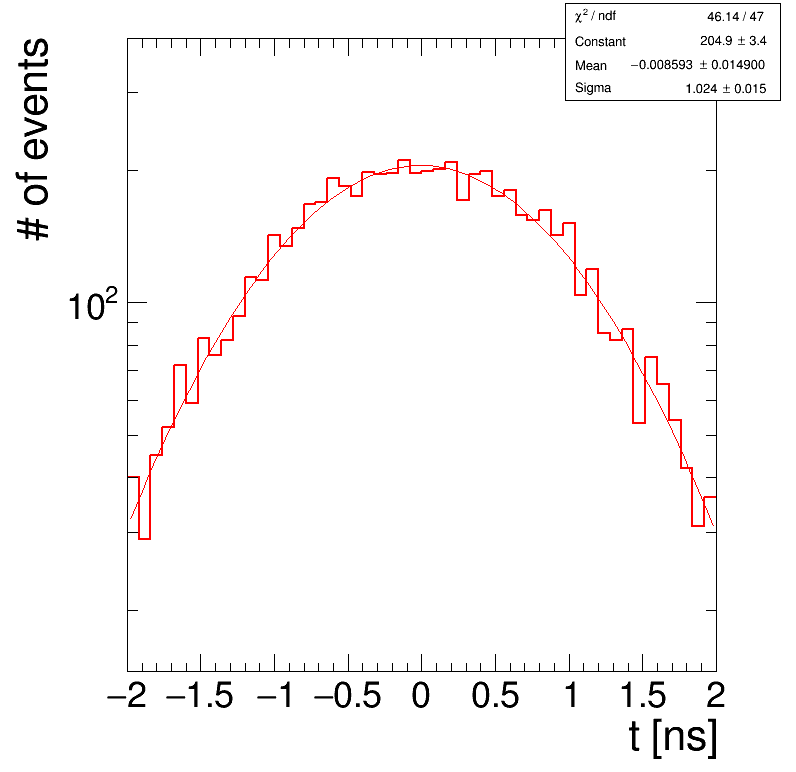

In [17]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gParticleEta'].array()
    pho_dt = v['gen_time'].array()
    pho_e = v['gParticleE'].array()
    pho_id = v['gParticleId'].array()    

    
    pho_pair_basic_string = np.logical_and(pho_id==111, abs(pho_eta)<1.4)
    pho_pair_basic_emax_string = np.logical_and(pho_pair_basic_string, pho_emax1>0)
 
    pho_pair_f1_string = np.logical_and(pho_pair_basic_string, pho_e>5) 
 
    pho_dt = pho_dt[pho_pair_f1_string]
  
    print('dt',pho_dt[0])
 
  
    dt = pho_dt.flatten()
    print('dt flat',dt[0],dt[1],dt[2])
    print('dt flat',len(dt))
    SmearTime = np.random.normal(0,1.0,len(dt))
    print('smear time',SmearTime[0],SmearTime[1],SmearTime[2])
    NewTime = [x+y for x,y in zip(dt, SmearTime)]
    print('new time',NewTime[0],NewTime[1],NewTime[2])
 
    
    ht0 = create_TH1D( NewTime, axis_title=['t [ns]', '# of events'], name="", binning=[50,-2,2])
#     ht0 = create_TH1D( dt, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[50,-2,2])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
#     ht0.Draw('')
    ht0.DrawNormalized('')
    ht0.Fit('gaus')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'pi0_gen_time_2.png')
# c.SaveAs(out_dir+'pi0_tof_same_direction.png')


i,j,n,s,m,a
analyzer-ebtp-qcd.root <TTree b'ecalTPTree' at 0x7f7110922be0>
dt [-0.13229227 -0.11944675 -0.1320796  -0.1145997  -0.15517807 -0.13214827
 -0.12382603 -0.14019251 -0.09949017 -0.12175989 -0.12049246 -0.12170219
 -0.1070261  -0.10345602 -0.09812975]
dt flat -0.13229227 -0.119446754 -0.1320796
dt flat 6606
smear time 0.2501809441459166 -2.319577299460086 0.1994736098972818
new time 0.11788867348551618 -2.4390240539156522 0.06739400860944
 FCN=36.4261 FROM MIGRAD    STATUS=CONVERGED      52 CALLS          53 TOTAL
                     EDM=9.8171e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     5.17636e+02   7.96286e+00   1.90781e-02  -1.69661e-05
   2  Mean         4.90471e-04   1.25460e-02   3.74730e-05   5.72768e-03
   3  Sigma        1.01306e+00   9.37400e-03   7.35913e-06  -4.30650e-02


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190918/pi0_gen_time_1ns.png has been created


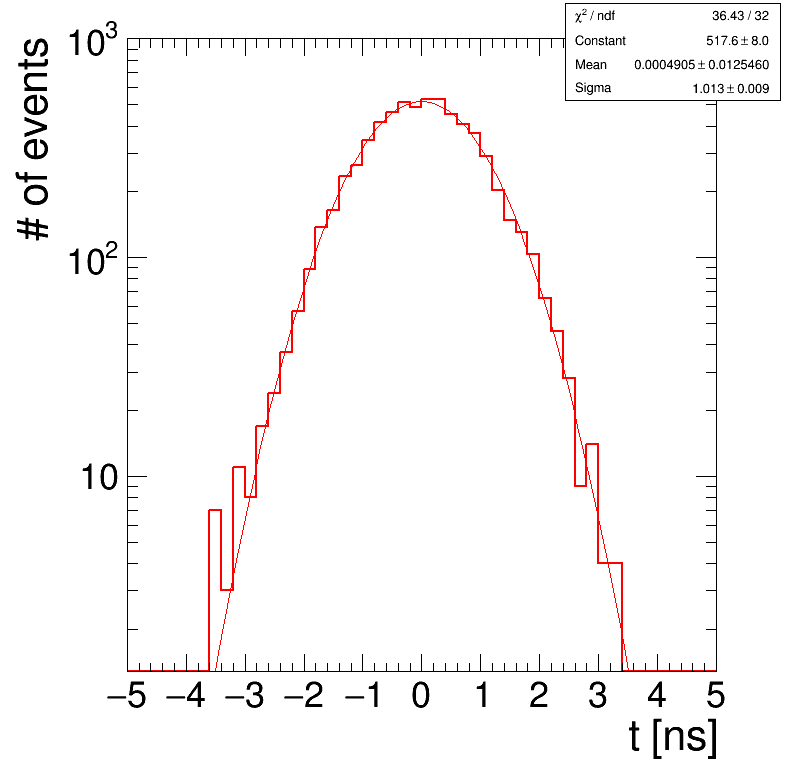

In [18]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gParticleEta'].array()
    pho_dt = v['gen_time'].array()
    pho_e = v['gParticleE'].array()
    pho_id = v['gParticleId'].array()    

    
    pho_pair_basic_string = np.logical_and(pho_id==111, abs(pho_eta)<1.4)
    pho_pair_basic_emax_string = np.logical_and(pho_pair_basic_string, pho_emax1>0)
 
    pho_pair_f1_string = np.logical_and(pho_pair_basic_string, pho_e>5) 
 
    pho_dt = pho_dt[pho_pair_f1_string]
  
    print('dt',pho_dt[0])
 
  
    dt = pho_dt.flatten()
    print('dt flat',dt[0],dt[1],dt[2])
    print('dt flat',len(dt))
    SmearTime = np.random.normal(0,1.0,len(dt))
    print('smear time',SmearTime[0],SmearTime[1],SmearTime[2])
    NewTime = [x+y for x,y in zip(dt, SmearTime)]
    print('new time',NewTime[0],NewTime[1],NewTime[2])
 
    
    ht0 = create_TH1D( NewTime, axis_title=['t [ns]', '# of events'], name="", binning=[50,-5,5])
#     ht0 = create_TH1D( dt, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[50,-2,2])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
#     ht0.Draw('')
    ht0.DrawNormalized('')
    ht0.Fit('gaus')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'pi0_gen_time_1ns.png')
# c.SaveAs(out_dir+'pi0_tof_same_direction.png')


i,j,n,s,m,a
analyzer-ebtp-qcd.root <TTree b'ecalTPTree' at 0x7f7110922be0>
dt [-0.13229227 -0.11944675 -0.1320796  -0.1145997  -0.15517807 -0.13214827
 -0.12382603 -0.14019251 -0.09949017 -0.12175989 -0.12049246 -0.12170219
 -0.1070261  -0.10345602 -0.09812975]
dt flat -0.13229227 -0.119446754 -0.1320796
dt flat 6606
smear time 0.1632848879393364 -0.39327831707420585 -1.4994099656948623
new time 0.030992617278936013 -0.5127250715297722 -1.631489566982704
 FCN=30.4029 FROM MIGRAD    STATUS=CONVERGED      60 CALLS          61 TOTAL
                     EDM=2.1416e-13    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     9.74380e+02   1.46007e+01   3.28786e-02   4.95220e-08
   2  Mean         1.32011e-02   6.65332e-03   1.81983e-05   3.09808e-05
   3  Sigma        5.38553e-01   4.59689e-03   6.37238e-06   2.10065e-04


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190918/pi0_gen_time_500ps.png has been created


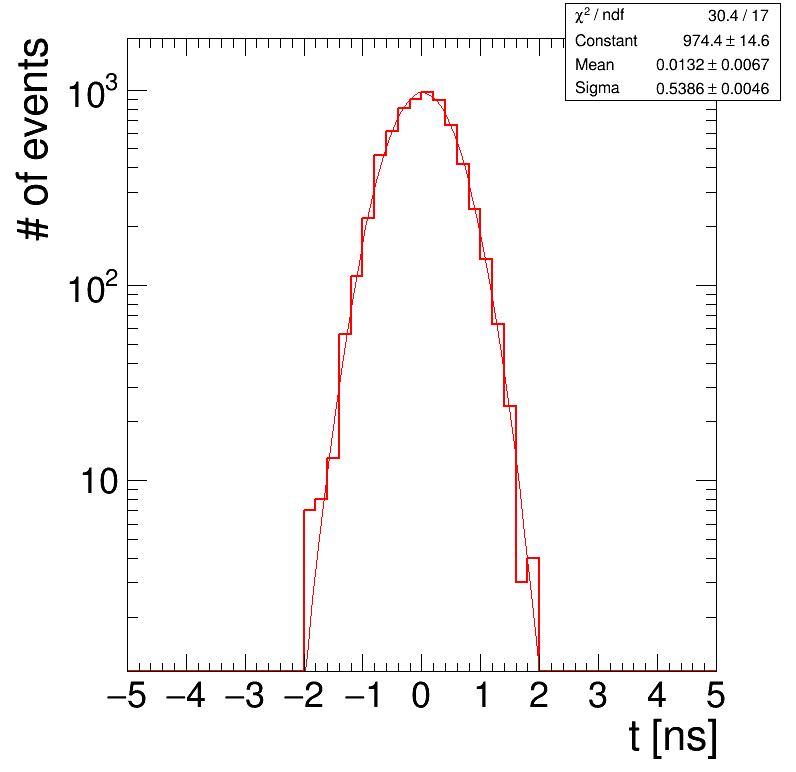

In [19]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gParticleEta'].array()
    pho_dt = v['gen_time'].array()
    pho_e = v['gParticleE'].array()
    pho_id = v['gParticleId'].array()    

    
    pho_pair_basic_string = np.logical_and(pho_id==111, abs(pho_eta)<1.4)
    pho_pair_basic_emax_string = np.logical_and(pho_pair_basic_string, pho_emax1>0)
 
    pho_pair_f1_string = np.logical_and(pho_pair_basic_string, pho_e>5) 
 
    pho_dt = pho_dt[pho_pair_f1_string]
  
    print('dt',pho_dt[0])
 
  
    dt = pho_dt.flatten()
    print('dt flat',dt[0],dt[1],dt[2])
    print('dt flat',len(dt))
    SmearTime = np.random.normal(0,0.5,len(dt))
    print('smear time',SmearTime[0],SmearTime[1],SmearTime[2])
    NewTime = [x+y for x,y in zip(dt, SmearTime)]
    print('new time',NewTime[0],NewTime[1],NewTime[2])
 
    
#     ht0 = create_TH1D( NewTime, axis_title=['t [ns]', '# of events'], name="", binning=[50,-2,2])
    ht0 = create_TH1D( NewTime, axis_title=['t [ns]', '# of events'], name="", binning=[50,-5,5])
#     ht0 = create_TH1D( dt, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[50,-2,2])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
#     ht0.Draw('')
    ht0.DrawNormalized('')
    ht0.Fit('gaus')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'pi0_gen_time_500ps.png')
# c.SaveAs(out_dir+'pi0_tof_same_direction.png')


i,j,n,s,m,a
analyzer-ebtp-qcd.root <TTree b'ecalTPTree' at 0x7f7110922be0>
dt [-0.13229227 -0.11944675 -0.1320796  -0.1145997  -0.15517807 -0.13214827
 -0.12382603 -0.14019251 -0.09949017 -0.12175989 -0.12049246 -0.12170219
 -0.1070261  -0.10345602 -0.09812975]
dt flat -0.13229227 -0.119446754 -0.1320796
dt flat 6606
smear time 0.11804110027509751 0.21546242366282065 0.2340230694935666
new time -0.01425117038530288 0.09601566920725424 0.10194346820572481
 FCN=34.0144 FROM MIGRAD    STATUS=CONVERGED      60 CALLS          61 TOTAL
                     EDM=2.0785e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     7.41156e+02   1.11539e+01   2.64153e-02  -1.51865e-06
   2  Mean         4.19687e-03   3.50059e-03   1.00908e-05  -4.26073e-03
   3  Sigma        2.83013e-01   2.44152e-03   6.73790e-06  -2.62277e-03


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190918/pi0_gen_time_200ps.png has been created


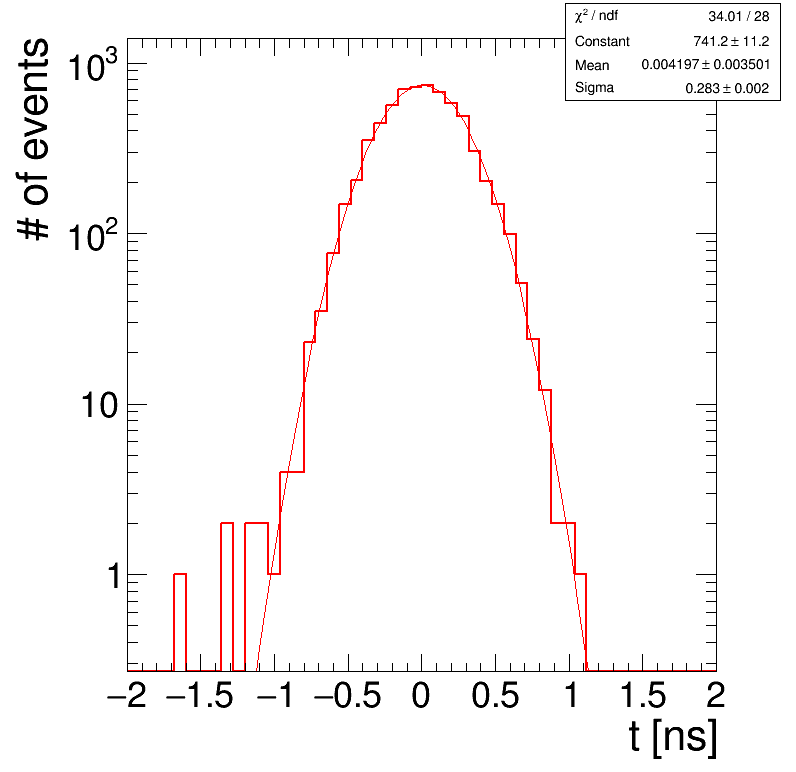

In [20]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gParticleEta'].array()
    pho_dt = v['gen_time'].array()
    pho_e = v['gParticleE'].array()
    pho_id = v['gParticleId'].array()    

    
    pho_pair_basic_string = np.logical_and(pho_id==111, abs(pho_eta)<1.4)
    pho_pair_basic_emax_string = np.logical_and(pho_pair_basic_string, pho_emax1>0)
 
    pho_pair_f1_string = np.logical_and(pho_pair_basic_string, pho_e>5) 
 
    pho_dt = pho_dt[pho_pair_f1_string]
  
    print('dt',pho_dt[0])
 
  
    dt = pho_dt.flatten()
    print('dt flat',dt[0],dt[1],dt[2])
    print('dt flat',len(dt))
    SmearTime = np.random.normal(0,0.2,len(dt))
    print('smear time',SmearTime[0],SmearTime[1],SmearTime[2])
    NewTime = [x+y for x,y in zip(dt, SmearTime)]
    print('new time',NewTime[0],NewTime[1],NewTime[2])
 
    
    ht0 = create_TH1D( NewTime, axis_title=['t [ns]', '# of events'], name="", binning=[50,-2,2])
#     ht0 = create_TH1D( dt, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[50,-2,2])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
#     ht0.Draw('')
    ht0.DrawNormalized('')
    ht0.Fit('gaus')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'pi0_gen_time_200ps.png')
# c.SaveAs(out_dir+'pi0_tof_same_direction.png')


i,j,n,s,m,a
analyzer-ebtp-qcd.root <TTree b'ecalTPTree' at 0x7f7110922be0>
dt [-0.13229227 -0.11944675 -0.1320796  -0.1145997  -0.15517807 -0.13214827
 -0.12382603 -0.14019251 -0.09949017 -0.12175989 -0.12049246 -0.12170219
 -0.1070261  -0.10345602 -0.09812975]
dt flat -0.13229227 -0.119446754 -0.1320796
dt flat 6606
smear time 0.16730724757717302 -0.01902311194835771 -0.09976326175831923
new time 0.03501497691677263 -0.1384698664039241 -0.23184286304616103
 FCN=35.4556 FROM MIGRAD    STATUS=CONVERGED      52 CALLS          53 TOTAL
                     EDM=2.54388e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     9.19084e+02   1.41174e+01   3.34233e-02   1.11884e-05
   2  Mean         1.94738e-03   2.82154e-03   8.30897e-06  -3.15494e-02
   3  Sigma        2.28211e-01   2.09399e-03   7.15819e-06  -2.18905e-02


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190918/pi0_gen_time_100ps.png has been created


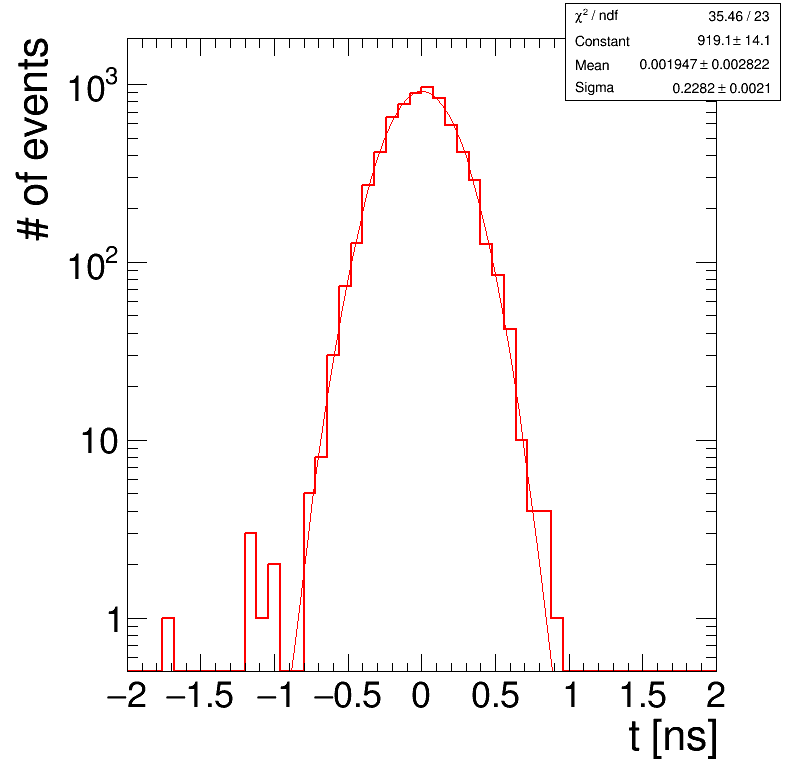

In [21]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gParticleEta'].array()
    pho_dt = v['gen_time'].array()
    pho_e = v['gParticleE'].array()
    pho_id = v['gParticleId'].array()    

    
    pho_pair_basic_string = np.logical_and(pho_id==111, abs(pho_eta)<1.4)
    pho_pair_basic_emax_string = np.logical_and(pho_pair_basic_string, pho_emax1>0)
 
    pho_pair_f1_string = np.logical_and(pho_pair_basic_string, pho_e>5) 
 
    pho_dt = pho_dt[pho_pair_f1_string]
  
    print('dt',pho_dt[0])
 
  
    dt = pho_dt.flatten()
    print('dt flat',dt[0],dt[1],dt[2])
    print('dt flat',len(dt))
    SmearTime = np.random.normal(0,0.1,len(dt))
    print('smear time',SmearTime[0],SmearTime[1],SmearTime[2])
    NewTime = [x+y for x,y in zip(dt, SmearTime)]
    print('new time',NewTime[0],NewTime[1],NewTime[2])
 
    
    ht0 = create_TH1D( NewTime, axis_title=['t [ns]', '# of events'], name="", binning=[50,-2,2])
#     ht0 = create_TH1D( dt, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[50,-2,2])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
#     ht0.Draw('')
    ht0.DrawNormalized('')
    ht0.Fit('gaus')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'pi0_gen_time_100ps.png')
# c.SaveAs(out_dir+'pi0_tof_same_direction.png')


i,j,n,s,m,a
analyzer-ebtp-qcd.root <TTree b'ecalTPTree' at 0x7f7110922be0>
dt [-0.13229227 -0.11944675 -0.1320796  -0.1145997  -0.15517807 -0.13214827
 -0.12382603 -0.14019251 -0.09949017 -0.12175989 -0.12049246 -0.12170219
 -0.1070261  -0.10345602 -0.09812975]
dt flat -0.13229227 -0.119446754 -0.1320796
dt flat 6606
smear time 0.07007932935193588 0.0007823408474402646 0.07509827029615723
new time -0.06221294130846451 -0.11866441360812614 -0.056981330991684565
 FCN=41.6934 FROM MIGRAD    STATUS=CONVERGED      62 CALLS          63 TOTAL
                     EDM=1.18473e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     9.94510e+02   1.52507e+01   3.91623e-02  -2.94683e-06
   2  Mean         3.98928e-03   2.61429e-03   8.30168e-06  -7.18474e-03
   3  Sigma        2.10676e-01   1.91962e-03   7.68275e-06   6.06543e-04


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190918/pi0_gen_time_50ps.png has been created


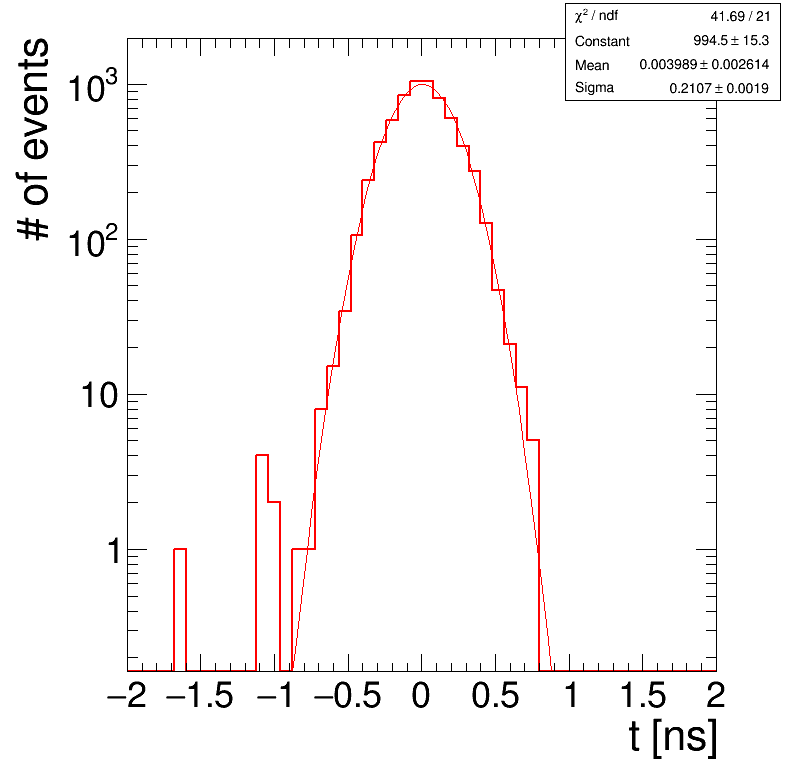

In [22]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gParticleEta'].array()
    pho_dt = v['gen_time'].array()
    pho_e = v['gParticleE'].array()
    pho_id = v['gParticleId'].array()    

    
    pho_pair_basic_string = np.logical_and(pho_id==111, abs(pho_eta)<1.4)
    pho_pair_basic_emax_string = np.logical_and(pho_pair_basic_string, pho_emax1>0)
 
    pho_pair_f1_string = np.logical_and(pho_pair_basic_string, pho_e>5) 
 
    pho_dt = pho_dt[pho_pair_f1_string]
  
    print('dt',pho_dt[0])
 
  
    dt = pho_dt.flatten()
    print('dt flat',dt[0],dt[1],dt[2])
    print('dt flat',len(dt))
    SmearTime = np.random.normal(0,0.05,len(dt))
    print('smear time',SmearTime[0],SmearTime[1],SmearTime[2])
    NewTime = [x+y for x,y in zip(dt, SmearTime)]
    print('new time',NewTime[0],NewTime[1],NewTime[2])
 
    
    ht0 = create_TH1D( NewTime, axis_title=['t [ns]', '# of events'], name="", binning=[50,-2,2])
#     ht0 = create_TH1D( dt, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[50,-2,2])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
#     ht0.Draw('')
    ht0.DrawNormalized('')
    ht0.Fit('gaus')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'pi0_gen_time_50ps.png')
# c.SaveAs(out_dir+'pi0_tof_same_direction.png')


i,j,n,s,m,a
analyzer-ebtp-qcd.root <TTree b'ecalTPTree' at 0x7f7110922be0>
dt [-0.13229227 -0.11944675 -0.1320796  -0.1145997  -0.15517807 -0.13214827
 -0.12382603 -0.14019251 -0.09949017 -0.12175989 -0.12049246 -0.12170219
 -0.1070261  -0.10345602 -0.09812975]
dt flat -0.13229227 -0.119446754 -0.1320796
dt flat 6606
smear time 0.07291148079028577 -0.0046449519590569975 0.010812612904151605
new time -0.05938078987011462 -0.1240917064146234 -0.1212669883836902
 FCN=31.0541 FROM MIGRAD    STATUS=CONVERGED      60 CALLS          61 TOTAL
                     EDM=3.57514e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     9.82880e+02   1.50068e+01   3.35099e-02  -2.12324e-06
   2  Mean         4.02702e-03   2.64085e-03   7.28509e-06  -2.93237e-02
   3  Sigma        2.13517e-01   1.92451e-03   6.61631e-06  -1.22841e-02


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190918/pi0_gen_time_60ps.png has been created


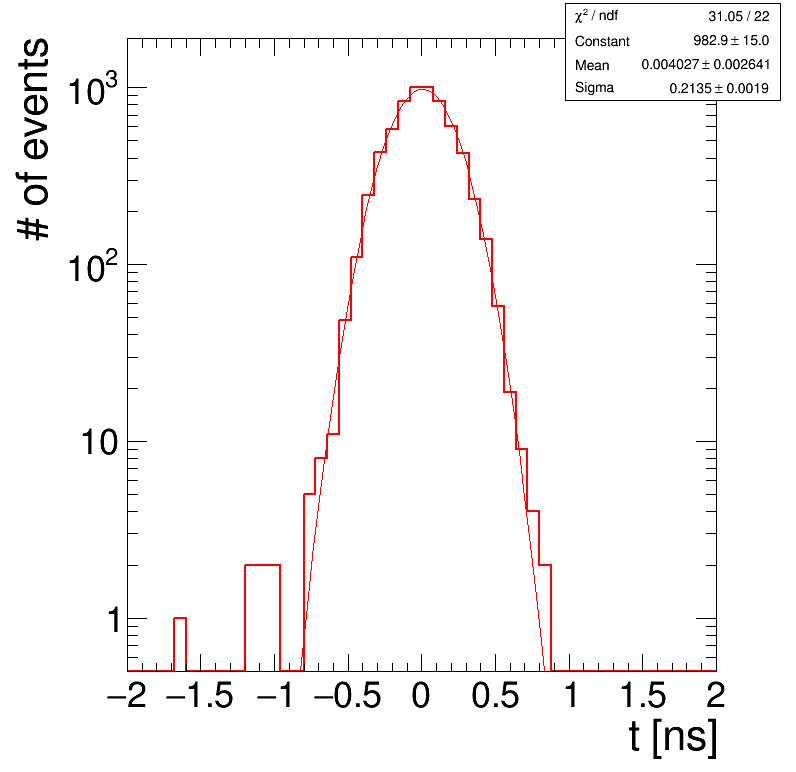

In [23]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gParticleEta'].array()
    pho_dt = v['gen_time'].array()
    pho_e = v['gParticleE'].array()
    pho_id = v['gParticleId'].array()    

    
    pho_pair_basic_string = np.logical_and(pho_id==111, abs(pho_eta)<1.4)
    pho_pair_basic_emax_string = np.logical_and(pho_pair_basic_string, pho_emax1>0)
 
    pho_pair_f1_string = np.logical_and(pho_pair_basic_string, pho_e>5) 
 
    pho_dt = pho_dt[pho_pair_f1_string]
  
    print('dt',pho_dt[0])
 
  
    dt = pho_dt.flatten()
    print('dt flat',dt[0],dt[1],dt[2])
    print('dt flat',len(dt))
    SmearTime = np.random.normal(0,0.06,len(dt))
    print('smear time',SmearTime[0],SmearTime[1],SmearTime[2])
    NewTime = [x+y for x,y in zip(dt, SmearTime)]
    print('new time',NewTime[0],NewTime[1],NewTime[2])
 
    
    ht0 = create_TH1D( NewTime, axis_title=['t [ns]', '# of events'], name="", binning=[50,-2,2])
#     ht0 = create_TH1D( dt, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[50,-2,2])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
#     ht0.Draw('')
    ht0.DrawNormalized('')
    ht0.Fit('gaus')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'pi0_gen_time_60ps.png')
# c.SaveAs(out_dir+'pi0_tof_same_direction.png')


i,j,n,s,m,a
analyzer-ebtp-qcd.root <TTree b'ecalTPTree' at 0x7f7110922be0>
dt [-0.13229227 -0.11944675 -0.1320796  -0.1145997  -0.15517807 -0.13214827
 -0.12382603 -0.14019251 -0.09949017 -0.12175989 -0.12049246 -0.12170219
 -0.1070261  -0.10345602 -0.09812975]
dt flat -0.13229227 -0.119446754 -0.1320796
dt flat 6606
smear time 0.004760302656914641 0.009070515844071123 -0.040026743754666944
new time -0.12753196800348576 -0.11037623861149529 -0.17210634504250874
 FCN=40.6182 FROM MIGRAD    STATUS=CONVERGED      60 CALLS          61 TOTAL
                     EDM=4.58378e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.01636e+03   1.55674e+01   3.95128e-02  -4.78607e-06
   2  Mean         2.26610e-03   2.55356e-03   8.02224e-06  -2.70773e-02
   3  Sigma        2.06183e-01   1.87305e-03   7.56522e-06  -3.54253e-03


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190918/pi0_gen_time_30ps.png has been created


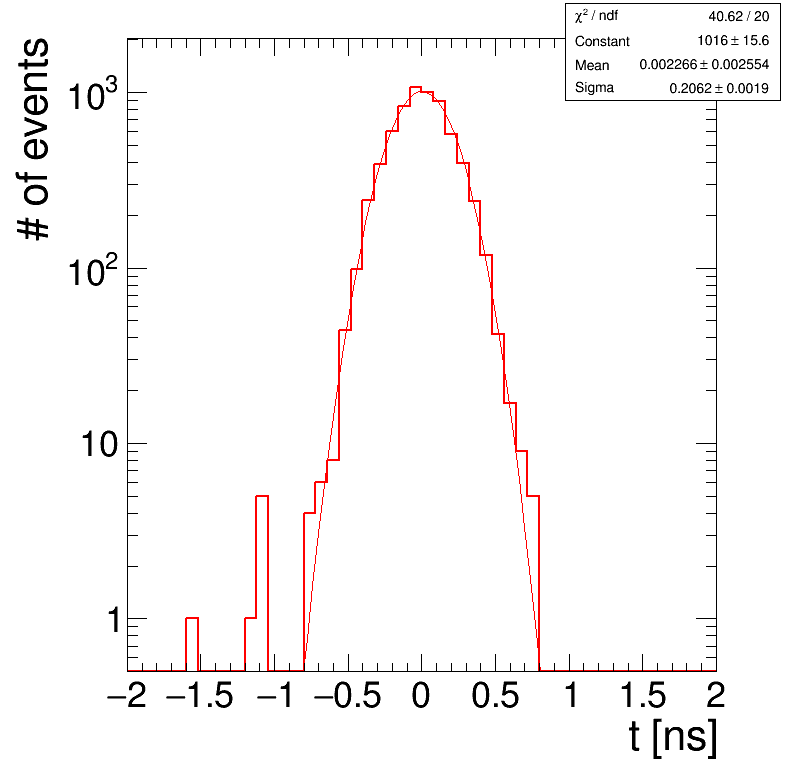

In [24]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gParticleEta'].array()
    pho_dt = v['gen_time'].array()
    pho_e = v['gParticleE'].array()
    pho_id = v['gParticleId'].array()    

    
    pho_pair_basic_string = np.logical_and(pho_id==111, abs(pho_eta)<1.4)
    pho_pair_basic_emax_string = np.logical_and(pho_pair_basic_string, pho_emax1>0)
 
    pho_pair_f1_string = np.logical_and(pho_pair_basic_string, pho_e>5) 
 
    pho_dt = pho_dt[pho_pair_f1_string]
  
    print('dt',pho_dt[0])
 
  
    dt = pho_dt.flatten()
    print('dt flat',dt[0],dt[1],dt[2])
    print('dt flat',len(dt))
    SmearTime = np.random.normal(0,0.03,len(dt))
    print('smear time',SmearTime[0],SmearTime[1],SmearTime[2])
    NewTime = [x+y for x,y in zip(dt, SmearTime)]
    print('new time',NewTime[0],NewTime[1],NewTime[2])
 
    
    ht0 = create_TH1D( NewTime, axis_title=['t [ns]', '# of events'], name="", binning=[50,-2,2])
#     ht0 = create_TH1D( dt, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[50,-2,2])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
#     ht0.Draw('')
    ht0.DrawNormalized('')
    ht0.Fit('gaus')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'pi0_gen_time_30ps.png')
# c.SaveAs(out_dir+'pi0_tof_same_direction.png')


i,j,n,s,m,a
analyzer-ebtp-qcd.root <TTree b'ecalTPTree' at 0x7f7110922be0>
tof [5.1844425 4.893134  7.7820296 8.073436  4.8183312 5.2278857 8.023872
 8.003964  5.291663  4.8599896 8.150461  8.177229 ]
tmax [5.2931    4.916183  8.177229  8.177229  4.893134  5.5208354 8.177229
 8.177229  5.336655  4.893134  8.177229  8.177229 ]
tmin [5.1844425 4.8183312 7.7820296 7.7820296 4.8183312 5.1844425 7.7820296
 7.7820296 5.0996666 4.8183312 7.7820296 7.7820296]
dt [ 0.01396561  0.00715971  0.03850889 -0.00660706  0.03830242  0.00518131
  0.01509619  0.03808594  0.03821325  0.01693583  0.00635862  0.03936672
  0.03931713]
 FCN=149.454 FROM MIGRAD    STATUS=CONVERGED      68 CALLS          69 TOTAL
                     EDM=1.63926e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.06028e+03   1.58205e+01   7.90353e-02  -1.45771e-05
   2  M

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


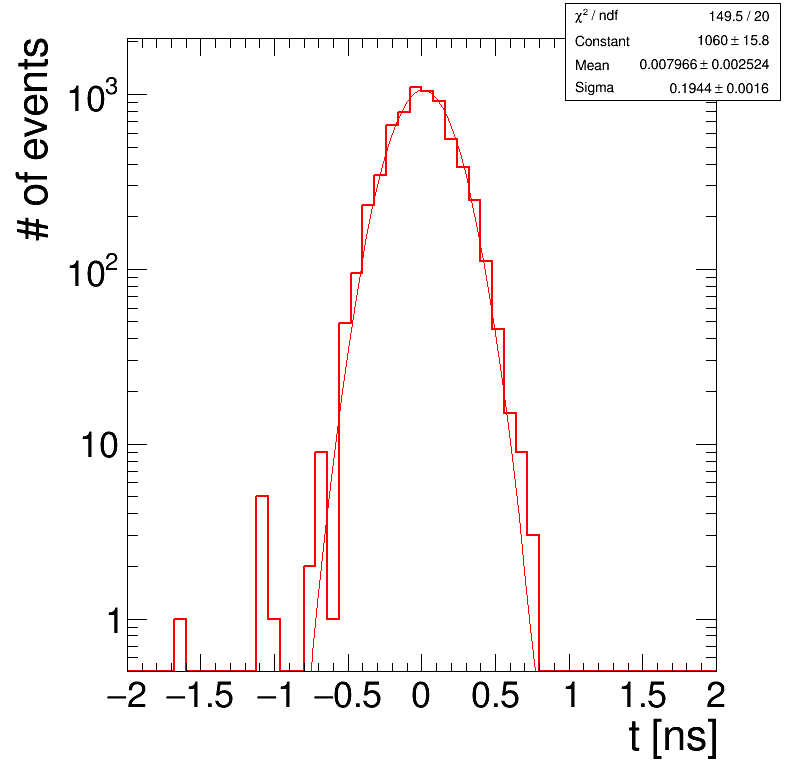

In [25]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gParticleEta'].array()
    pho_tof = v['g_tof'].array()
#     pho_dt = v['g_dt_sc_01'].array()
    pho_dt = v['gen_time'].array()
#     pho_dt = v['gen_time_max_01'].array()
    cnt = v['g_cnt_sc_01'].array()
    pho_tmax = v['g_tmax_sc_01'].array()
    pho_tmin = v['g_tmin_sc_01'].array()
    pho_e = v['gParticleE'].array()
    pho_emax1 = v['gEmax_01'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
#     for ii,x in enumerate(pho_tmax):
#         for j,y in enumerate(x):
#             if(y==1000):
#                 pho_tma[ii][j] = 0.
    
    pho_pair_basic_string = np.logical_and(pho_id==111, abs(pho_eta)<1.4)
    pho_pair_basic_emax_string = np.logical_and(pho_pair_basic_string, pho_emax1>0)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_emax2>0)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_e>5)
    pho_pair_f1_string = np.logical_and(pho_pair_basic_string, pho_e>5)
    pho_time_equal_string = np.logical_and(pho_tmax==pho_tmin, pho_tmin==pho_tof)
    pho_time_not_equal_string = np.logical_not(pho_time_equal_string )
    pho_time_not_equal_string = np.logical_and(cnt>1, 1 )
#     pho_pair_f_string = np.logical_and(pho_pair_basic_string, 1)
    pho_pair_f_string = np.logical_and(pho_pair_f1_string, pho_time_not_equal_string)
    
    pho_tof = pho_tof[pho_pair_f_string]
    pho_dt = pho_dt[pho_pair_f1_string]
    pho_tmax = pho_tmax[pho_pair_f_string]
    pho_tmin = pho_tmin[pho_pair_f_string]
    
    print('tof',pho_tof[1])
    print('tmax',pho_tmax[1])
    print('tmin',pho_tmin[1])
    print('dt',pho_dt[1])
#     eta = pho_eta[:,0]
    tof = pho_tof.flatten()
    tmax = pho_tmax.flatten()
    tmin = pho_tmin.flatten()
    dt = pho_dt.flatten()
#     dt = tmax-tmin
#     dt = tmax-tof
#     dt = tmin-tof
    
    ht0 = create_TH1D( dt, axis_title=['t [ns]', '# of events'], name="", binning=[50,-2,2])
#     ht0 = create_TH1D( dt, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[50,-2,2])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
#     ht0.Draw('')
    ht0.DrawNormalized('')
    ht0.Fit('gaus')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
# c.SaveAs(out_dir+'pi0_gen_time_1.png')
# c.SaveAs(out_dir+'pi0_tof_same_direction.png')


i,j,n,s,m,a
analyzer-ebtp-qcd.root <TTree b'ecalTPTree' at 0x7f7110922be0>
 FCN=87.0895 FROM MIGRAD    STATUS=CONVERGED      52 CALLS          53 TOTAL
                     EDM=4.69772e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.28412e+03   2.71626e+01   9.95544e-02  -4.03486e-05
   2  Mean         8.41201e-03   1.47338e-03   6.73123e-06  -1.37062e-01
   3  Sigma        2.22030e-01   1.10217e-03   6.00827e-06  -6.10788e-01


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190918/pi0_gen_time_tp.png has been created


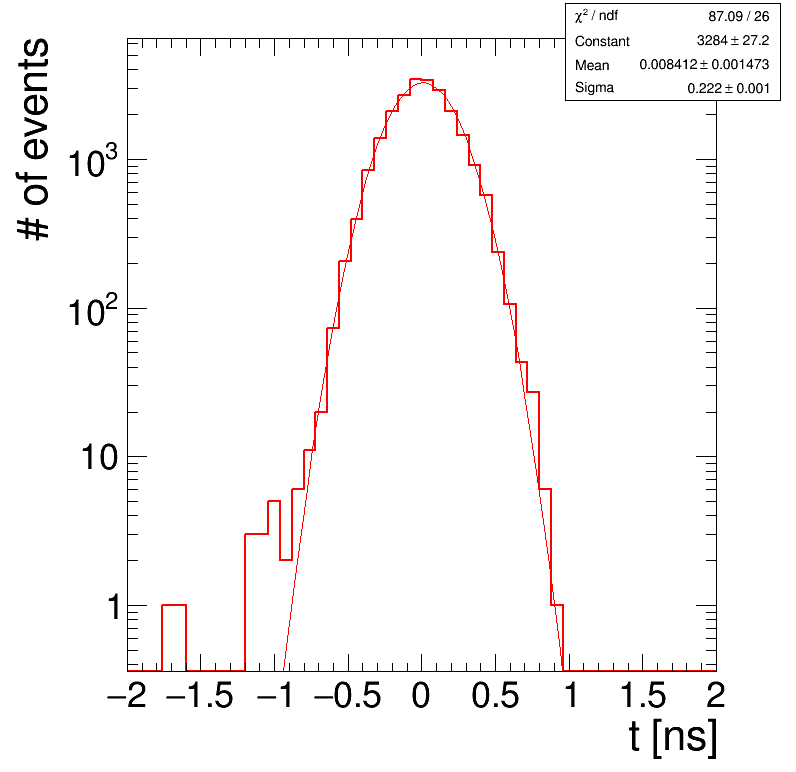

In [26]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gParticleEta'].array()
    pho_tof = v['g_tof'].array()
#     pho_dt = v['g_dt_sc_01'].array()
    pho_dt = v['gen_time'].array()
    eb_et = v['eb_Et'].array()
    eb_edep = v['eb_Edep'].array()
    eb_eta = v['eb_cell_Eta'].array()
    pho_tp = v['gen_time_tp'].array()
    pho_tp_e = v['gen_time_e'].array()
#     pho_dt = v['gen_time_max_01'].array()
    cnt = v['g_cnt_sc_01'].array()
    pho_tmax = v['g_tmax_sc_01'].array()
    pho_tmin = v['g_tmin_sc_01'].array()
    pho_e = v['gParticleE'].array()
    pho_emax1 = v['gEmax_01'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
#     for ii,x in enumerate(pho_tmax):
#         for j,y in enumerate(x):
#             if(y==1000):
#                 pho_tma[ii][j] = 0.
    
    basic_string = np.logical_and(pho_tp>-666, pho_tp_e>5)
    basic1_string = np.logical_and(abs(eb_eta)<1.4,eb_edep>1)
    basic2_string = np.logical_and(basic_string,basic1_string)
 
    tp1 = pho_tp[basic2_string]
  
    tp = tp1.flatten()
 
    ht0 = create_TH1D( tp, axis_title=['t [ns]', '# of events'], name="", binning=[50,-2,2])
#     ht0 = create_TH1D( dt, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[50,-2,2])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
#     ht0.Draw('')
    ht0.DrawNormalized('')
    ht0.Fit('gaus')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'pi0_gen_time_tp.png')
# c.SaveAs(out_dir+'pi0_tof_same_direction.png')


i,j,n,s,m,a
analyzer-ebtp-qcd.root <TTree b'ecalTPTree' at 0x7f7110922be0>
smear time 0.043286625632624226 0.07404249665708026 0.039609407174627076
new time -0.08900564502777616 -0.04540425779848614 -0.09247019411321472
 FCN=38.228 FROM MIGRAD    STATUS=CONVERGED      60 CALLS          61 TOTAL
                     EDM=2.12599e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     9.84312e+02   1.51141e+01   3.71444e-02  -3.94436e-06
   2  Mean         1.83875e-03   2.63838e-03   8.04288e-06   2.42027e-03
   3  Sigma        2.12974e-01   1.94904e-03   7.37898e-06   2.58759e-03


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190918/pi0_gen_time_tp_60ps.png has been created


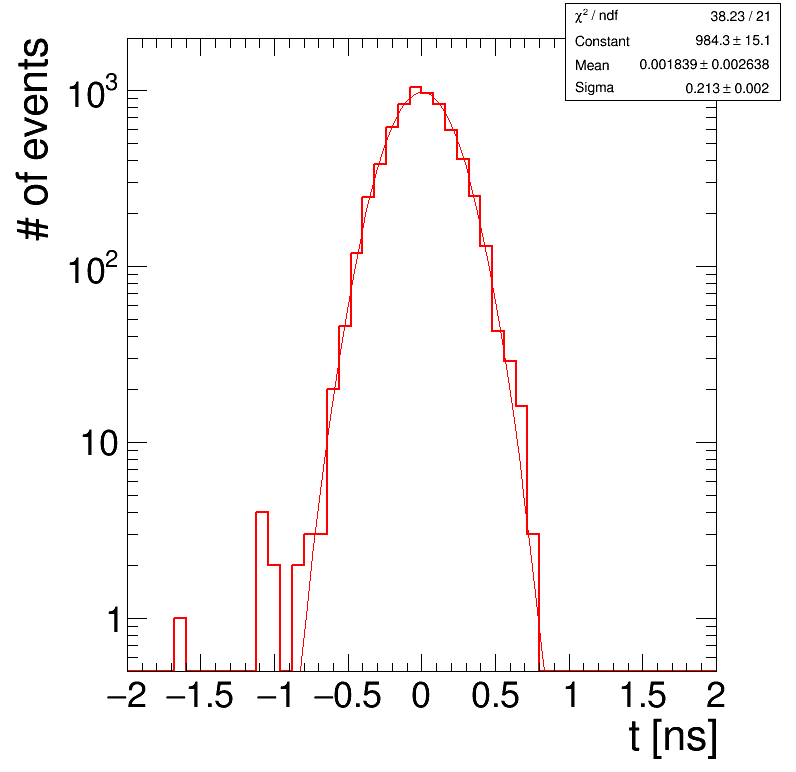

In [27]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gParticleEta'].array()
    pho_tof = v['g_tof'].array()
#     pho_dt = v['g_dt_sc_01'].array()
    pho_dt = v['gen_time'].array()
    eb_et = v['eb_Et'].array()
    eb_edep = v['eb_Edep'].array()
    eb_eta = v['eb_cell_Eta'].array()
    pho_tp = v['gen_time_tp'].array()
    pho_tp_e = v['gen_time_e'].array()
#     pho_dt = v['gen_time_max_01'].array()
    cnt = v['g_cnt_sc_01'].array()
    pho_tmax = v['g_tmax_sc_01'].array()
    pho_tmin = v['g_tmin_sc_01'].array()
    pho_e = v['gParticleE'].array()
    pho_emax1 = v['gEmax_01'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
#     for ii,x in enumerate(pho_tmax):
#         for j,y in enumerate(x):
#             if(y==1000):
#                 pho_tma[ii][j] = 0.
    
    basic_string = np.logical_and(pho_tp>-666, pho_tp_e>5)
    basic1_string = np.logical_and(abs(eb_eta)<1.4,eb_edep>1)
    basic2_string = np.logical_and(basic_string,basic1_string)
 
    tp1 = pho_tp[basic2_string]
  
    tp = tp1.flatten()

    SmearTime = np.random.normal(0,0.06,len(dt))
    print('smear time',SmearTime[0],SmearTime[1],SmearTime[2])
    NewTime = [x+y for x,y in zip(dt, SmearTime)]
    print('new time',NewTime[0],NewTime[1],NewTime[2])
 
    
    ht0 = create_TH1D( NewTime, axis_title=['t [ns]', '# of events'], name="", binning=[50,-2,2])
#     ht0 = create_TH1D( dt, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[50,-2,2])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
#     ht0.Draw('')
    ht0.DrawNormalized('')
    ht0.Fit('gaus')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'pi0_gen_time_tp_60ps.png')
# c.SaveAs(out_dir+'pi0_tof_same_direction.png')


i,j,n,s,m,a
analyzer-ebtp-qcd.root <TTree b'ecalTPTree' at 0x7f7110922be0>
smear time 0.09039176780649912 0.01913852478594499 -0.029253484048234454
new time -0.041900502853901275 -0.10030822966962141 -0.16133308533607627
 FCN=23.8047 FROM MIGRAD    STATUS=CONVERGED      60 CALLS          61 TOTAL
                     EDM=2.25264e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     9.16083e+02   1.39313e+01   2.74596e-02  -2.48635e-06
   2  Mean         4.13694e-03   2.83058e-03   6.87783e-06  -2.15526e-02
   3  Sigma        2.29331e-01   2.04459e-03   5.78748e-06  -6.40236e-03


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190918/pi0_gen_time_tp_100ps.png has been created


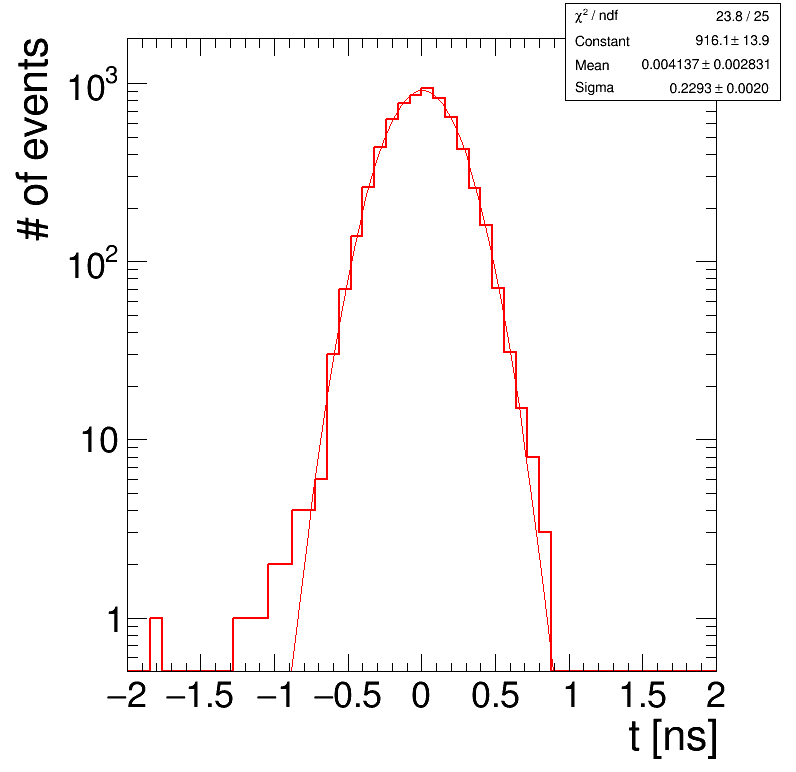

In [28]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gParticleEta'].array()
    pho_tof = v['g_tof'].array()
#     pho_dt = v['g_dt_sc_01'].array()
    pho_dt = v['gen_time'].array()
    eb_et = v['eb_Et'].array()
    eb_edep = v['eb_Edep'].array()
    eb_eta = v['eb_cell_Eta'].array()
    pho_tp = v['gen_time_tp'].array()
    pho_tp_e = v['gen_time_e'].array()
#     pho_dt = v['gen_time_max_01'].array()
    cnt = v['g_cnt_sc_01'].array()
    pho_tmax = v['g_tmax_sc_01'].array()
    pho_tmin = v['g_tmin_sc_01'].array()
    pho_e = v['gParticleE'].array()
    pho_emax1 = v['gEmax_01'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
#     for ii,x in enumerate(pho_tmax):
#         for j,y in enumerate(x):
#             if(y==1000):
#                 pho_tma[ii][j] = 0.
    
    basic_string = np.logical_and(pho_tp>-666, pho_tp_e>5)
    basic1_string = np.logical_and(abs(eb_eta)<1.4,eb_edep>1)
    basic2_string = np.logical_and(basic_string,basic1_string)
 
    tp1 = pho_tp[basic2_string]
  
    tp = tp1.flatten()

    SmearTime = np.random.normal(0,0.1,len(dt))
    print('smear time',SmearTime[0],SmearTime[1],SmearTime[2])
    NewTime = [x+y for x,y in zip(dt, SmearTime)]
    print('new time',NewTime[0],NewTime[1],NewTime[2])
 
    
    ht0 = create_TH1D( NewTime, axis_title=['t [ns]', '# of events'], name="", binning=[50,-2,2])
#     ht0 = create_TH1D( dt, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[50,-2,2])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
#     ht0.Draw('')
    ht0.DrawNormalized('')
    ht0.Fit('gaus')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'pi0_gen_time_tp_100ps.png')
# c.SaveAs(out_dir+'pi0_tof_same_direction.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-eb-tp.root <TTree b'ecalTPTree' at 0x7fc8f76cfa90>
smear time -0.07193371624135483 0.07611249597761388 -0.06204665212045893
new time -0.15320393413686265 -0.137430442254808 -0.14113152531992182
 FCN=20.1034 FROM MIGRAD    STATUS=CONVERGED      59 CALLS          60 TOTAL
                     EDM=1.77224e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     4.19746e+02   8.20833e+00   1.50729e-02  -2.70538e-06
   2  Mean        -1.01215e-02   4.79108e-03   1.07361e-05  -8.61921e-04
   3  Sigma        2.97022e-01   3.37921e-03   6.95398e-06  -4.01688e-03


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190814/pi0_gen_time_tp_200ps.png has been created


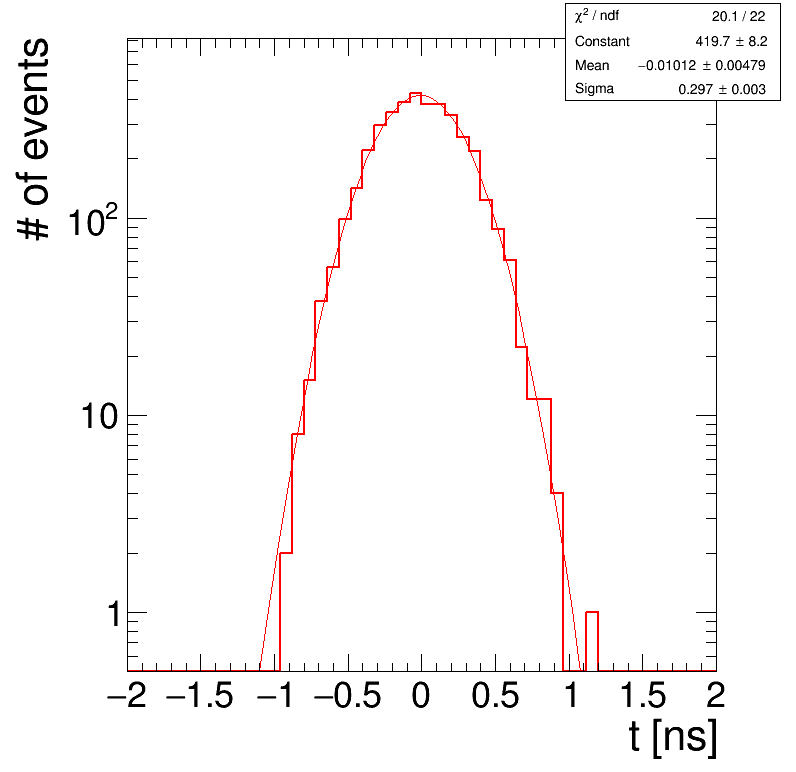

In [17]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gParticleEta'].array()
    pho_tof = v['g_tof'].array()
#     pho_dt = v['g_dt_sc_01'].array()
    pho_dt = v['gen_time'].array()
    eb_et = v['eb_Et'].array()
    eb_edep = v['eb_Edep'].array()
    eb_eta = v['eb_cell_Eta'].array()
    pho_tp = v['gen_time_tp'].array()
    pho_tp_e = v['gen_time_e'].array()
#     pho_dt = v['gen_time_max_01'].array()
    cnt = v['g_cnt_sc_01'].array()
    pho_tmax = v['g_tmax_sc_01'].array()
    pho_tmin = v['g_tmin_sc_01'].array()
    pho_e = v['gParticleE'].array()
    pho_emax1 = v['gEmax_01'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
#     for ii,x in enumerate(pho_tmax):
#         for j,y in enumerate(x):
#             if(y==1000):
#                 pho_tma[ii][j] = 0.
    
    basic_string = np.logical_and(pho_tp>-666, pho_tp_e>5)
    basic1_string = np.logical_and(abs(eb_eta)<1.4,eb_edep>1)
    basic2_string = np.logical_and(basic_string,basic1_string)
 
    tp1 = pho_tp[basic2_string]
  
    tp = tp1.flatten()

    SmearTime = np.random.normal(0,0.2,len(dt))
    print('smear time',SmearTime[0],SmearTime[1],SmearTime[2])
    NewTime = [x+y for x,y in zip(dt, SmearTime)]
    print('new time',NewTime[0],NewTime[1],NewTime[2])
 
    
    ht0 = create_TH1D( NewTime, axis_title=['t [ns]', '# of events'], name="", binning=[50,-2,2])
#     ht0 = create_TH1D( dt, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[50,-2,2])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
#     ht0.Draw('')
    ht0.DrawNormalized('')
    ht0.Fit('gaus')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'pi0_gen_time_tp_200ps.png')
# c.SaveAs(out_dir+'pi0_tof_same_direction.png')


i,j,n,s,m,a
analyzer-ebtp-qcd.root <TTree b'ecalTPTree' at 0x7f7110922be0>
smear time 0.3151203523865932 -0.15113518977240276 0.13587917873698135
new time 0.1828280817261928 -0.27058194422796916 0.0037995774491395573
 FCN=12.3025 FROM MIGRAD    STATUS=CONVERGED      52 CALLS          53 TOTAL
                     EDM=1.1684e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     9.60639e+02   1.46591e+01   2.10586e-02  -3.88584e-05
   2  Mean         2.95224e-03   6.76103e-03   1.20240e-05   7.96570e-03
   3  Sigma        5.47737e-01   4.94638e-03   4.31368e-06  -1.57443e-01


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190918/pi0_gen_time_tp_500ps.png has been created


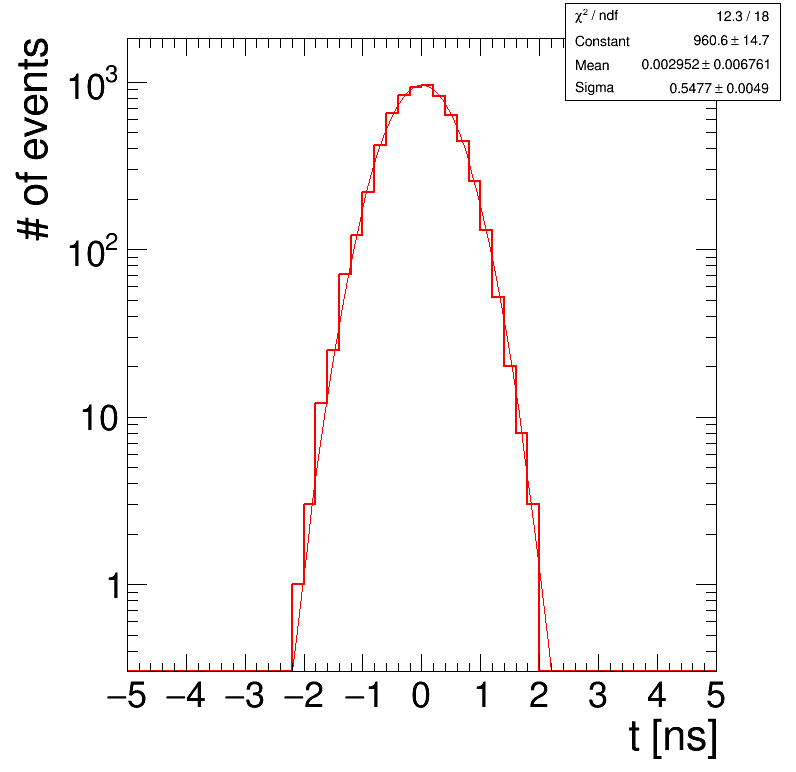

In [29]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gParticleEta'].array()
    pho_tof = v['g_tof'].array()
#     pho_dt = v['g_dt_sc_01'].array()
    pho_dt = v['gen_time'].array()
    eb_et = v['eb_Et'].array()
    eb_edep = v['eb_Edep'].array()
    eb_eta = v['eb_cell_Eta'].array()
    pho_tp = v['gen_time_tp'].array()
    pho_tp_e = v['gen_time_e'].array()
#     pho_dt = v['gen_time_max_01'].array()
    cnt = v['g_cnt_sc_01'].array()
    pho_tmax = v['g_tmax_sc_01'].array()
    pho_tmin = v['g_tmin_sc_01'].array()
    pho_e = v['gParticleE'].array()
    pho_emax1 = v['gEmax_01'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
#     for ii,x in enumerate(pho_tmax):
#         for j,y in enumerate(x):
#             if(y==1000):
#                 pho_tma[ii][j] = 0.
    
    basic_string = np.logical_and(pho_tp>-666, pho_tp_e>5)
    basic1_string = np.logical_and(abs(eb_eta)<1.4,eb_edep>1)
    basic2_string = np.logical_and(basic_string,basic1_string)
 
    tp1 = pho_tp[basic2_string]
  
    tp = tp1.flatten()

    SmearTime = np.random.normal(0,0.5,len(dt))
    print('smear time',SmearTime[0],SmearTime[1],SmearTime[2])
    NewTime = [x+y for x,y in zip(dt, SmearTime)]
    print('new time',NewTime[0],NewTime[1],NewTime[2])
 
    
    ht0 = create_TH1D( NewTime, axis_title=['t [ns]', '# of events'], name="", binning=[50,-5,5])
#     ht0 = create_TH1D( dt, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[50,-2,2])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
#     ht0.Draw('')
    ht0.DrawNormalized('')
    ht0.Fit('gaus')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'pi0_gen_time_tp_500ps.png')
# c.SaveAs(out_dir+'pi0_tof_same_direction.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-jet-time.root <TTree b'ecalTPTree' at 0x7f2dbf538b70>
smear time -1.0364768030299074 1.466460180813979 -0.5366482342513138
new time -1.0275380136622316 1.340561342770766 -0.5950541104109818
 FCN=29.5451 FROM MIGRAD    STATUS=CONVERGED      54 CALLS          55 TOTAL
                     EDM=4.4367e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     6.75942e+02   8.98636e+00   1.96227e-02  -4.04192e-05
   2  Mean        -2.66643e-02   1.09990e-02   2.96637e-05  -1.47952e-04
   3  Sigma        1.01984e+00   7.99179e-03   5.68043e-06  -1.00415e-01


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190814/pi0_gen_time_tp_1ns.png has been created


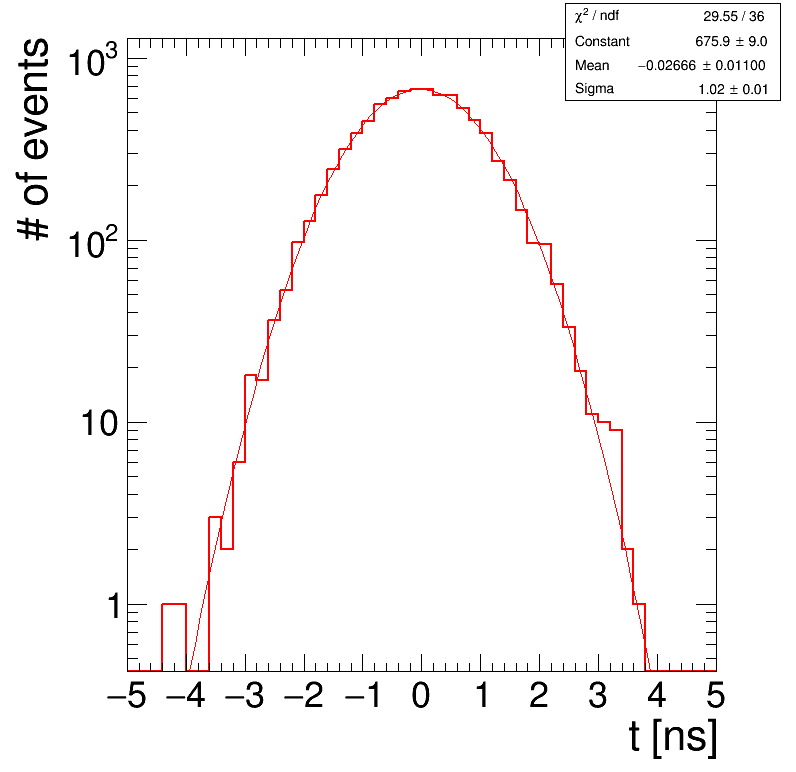

In [4]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gParticleEta'].array()
    pho_tof = v['g_tof'].array()
#     pho_dt = v['g_dt_sc_01'].array()
    pho_dt = v['gen_time'].array()
    eb_et = v['eb_Et'].array()
    eb_edep = v['eb_Edep'].array()
    eb_eta = v['eb_cell_Eta'].array()
    pho_tp = v['gen_time_tp'].array()
    pho_tp_e = v['gen_time_e'].array()
#     pho_dt = v['gen_time_max_01'].array()
    cnt = v['g_cnt_sc_01'].array()
    pho_tmax = v['g_tmax_sc_01'].array()
    pho_tmin = v['g_tmin_sc_01'].array()
    pho_e = v['gParticleE'].array()
    pho_emax1 = v['gEmax_01'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
#     for ii,x in enumerate(pho_tmax):
#         for j,y in enumerate(x):
#             if(y==1000):
#                 pho_tma[ii][j] = 0.
    
    basic_string = np.logical_and(pho_tp>-666, pho_tp_e>5)
    basic1_string = np.logical_and(abs(eb_eta)<1.4,eb_edep>1)
    basic2_string = np.logical_and(basic_string,basic1_string)
 
    tp1 = pho_tp[basic2_string]
  
    tp = tp1.flatten()

    SmearTime = np.random.normal(0,1.,len(tp))
    print('smear time',SmearTime[0],SmearTime[1],SmearTime[2])
    NewTime = [x+y for x,y in zip(tp, SmearTime)]
    print('new time',NewTime[0],NewTime[1],NewTime[2])
 
    
    ht0 = create_TH1D( NewTime, axis_title=['t [ns]', '# of events'], name="", binning=[50,-5,5])
#     ht0 = create_TH1D( dt, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[50,-2,2])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
#     ht0.Draw('')
    ht0.DrawNormalized('')
    ht0.Fit('gaus')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'pi0_gen_time_tp_1ns.png')
# c.SaveAs(out_dir+'pi0_tof_same_direction.png')


# jet time

i,j,n,s,m,a
analyzer-ebtp-qcd.root <TTree b'ecalTPTree' at 0x7f7110922be0>
 FCN=14.5858 FROM MIGRAD    STATUS=CONVERGED      52 CALLS          53 TOTAL
                     EDM=4.06949e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.76142e+02   6.39707e+00   9.90650e-03  -1.56074e-04
   2  Mean         5.65666e-03   6.23270e-03   1.20113e-05  -5.44982e-03
   3  Sigma        2.13056e-01   4.63356e-03   1.11555e-05  -1.39647e-01


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190918/jet_time.png has been created


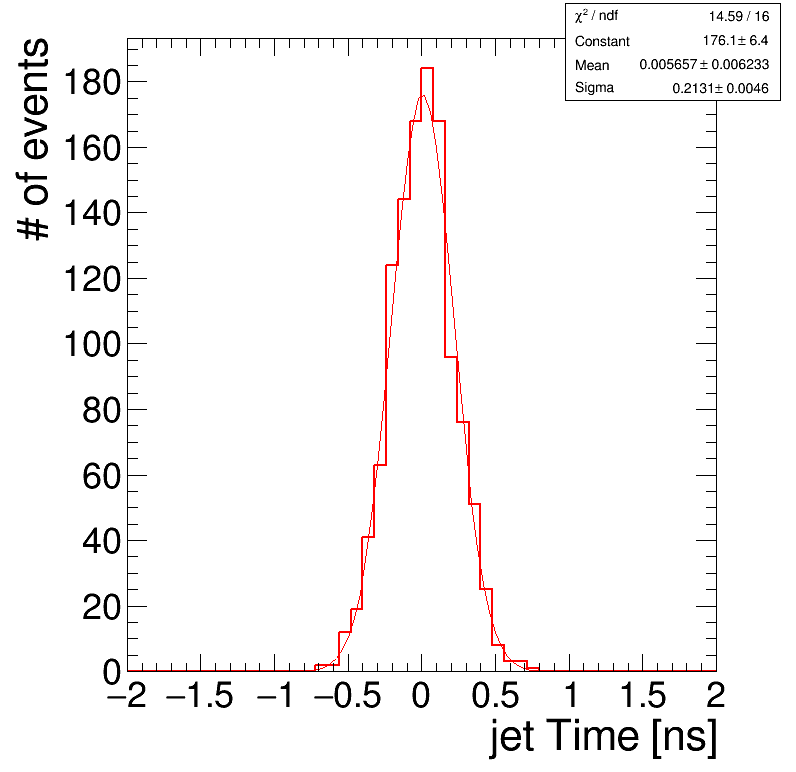

In [30]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
 
    jet_t5 = v['gak4JetNoNuTime_t5'].array()
    jet_eta = v['gak4JetNoNuEta'].array()
    jet_e = v['gak4JetNoNuE'].array()
    jet_t = v['gak4JetNoNuTime'].array()
    jet_Esum_t = v['gak4JetNoNuEsum_t'].array()
  
    
    basic_string = np.logical_and(jet_t>-666, jet_e>30)
    basic1_string = np.logical_and(abs(jet_eta)<1.4,jet_Esum_t>5)
    basic2_string = np.logical_and(basic_string,basic1_string)
 
    tp1 = jet_t5[basic2_string]
  
    tp = tp1.flatten()

#     SmearTime = np.random.normal(0,1.,len(tp))
#     print('smear time',SmearTime[0],SmearTime[1],SmearTime[2])
#     NewTime = [x+y for x,y in zip(tp, SmearTime)]
#     print('new time',NewTime[0],NewTime[1],NewTime[2])
 
    
#     ht0 = create_TH1D( NewTime, axis_title=['t [ns]', '# of events'], name="", binning=[50,-5,5])
    ht0 = create_TH1D( tp, axis_title=['jet Time [ns]', '# of events'], name="", binning=[50,-2,2])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
#     ht0.Draw('')
    ht0.DrawNormalized('')
    ht0.Fit('gaus')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'jet_time.png')
# c.SaveAs(out_dir+'pi0_tof_same_direction.png')


i,j,n,s,m,a
analyzer-ebtp-qcd.root <TTree b'ecalTPTree' at 0x7f7110922be0>
 FCN=19.6525 FROM MIGRAD    STATUS=CONVERGED      60 CALLS          61 TOTAL
                     EDM=6.11133e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.44681e+02   7.56870e+00   1.34016e-02   2.88044e-06
   2  Mean         1.46075e-02   5.32791e-03   1.17624e-05  -4.43181e-02
   3  Sigma        2.14171e-01   4.01155e-03   1.07622e-05  -1.71011e-01


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190918/jet_time_pt20.png has been created


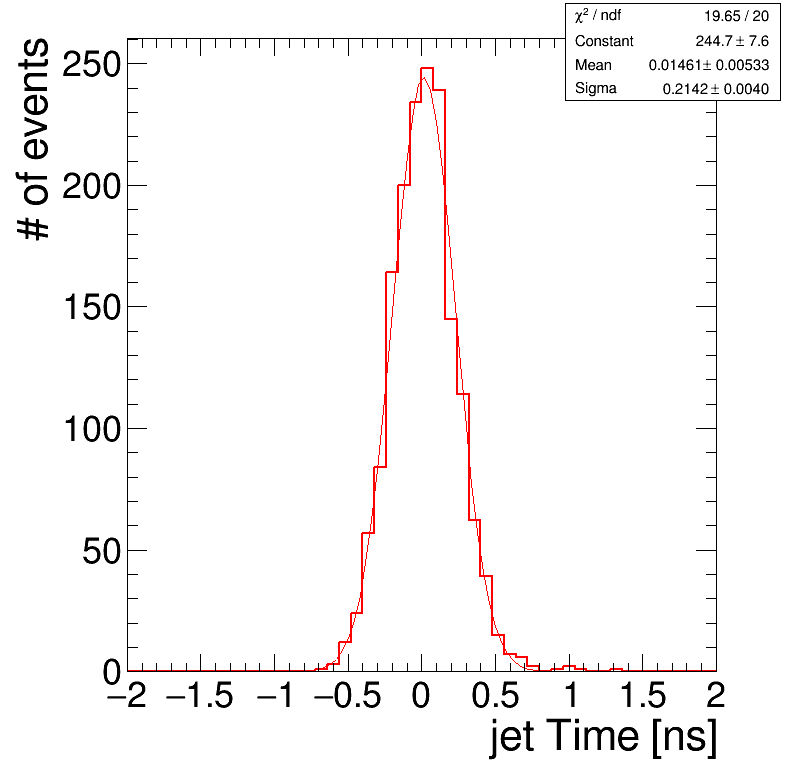

In [31]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
 
    jet_t5 = v['gak4JetNoNuTime_t'].array()
    jet_eta = v['gak4JetNoNuEta'].array()
    jet_e = v['gak4JetNoNuPt'].array()
    jet_t = v['gak4JetNoNuTime'].array()
    jet_Esum_t = v['gak4JetNoNuEsum_t'].array()
  
    
    basic_string = np.logical_and(jet_t>-666, jet_e>20)
#     basic1_string = np.logical_and(abs(jet_eta)<1.4,jet_Esum_t>5)
    basic1_string = np.logical_and(abs(jet_eta)<1.4,1)
    basic2_string = np.logical_and(basic_string,basic1_string)
 
    tp1 = jet_t5[basic2_string]
  
    tp = tp1.flatten()

#     SmearTime = np.random.normal(0,1.,len(tp))
#     print('smear time',SmearTime[0],SmearTime[1],SmearTime[2])
#     NewTime = [x+y for x,y in zip(tp, SmearTime)]
#     print('new time',NewTime[0],NewTime[1],NewTime[2])
 
    
#     ht0 = create_TH1D( NewTime, axis_title=['t [ns]', '# of events'], name="", binning=[50,-5,5])
    ht0 = create_TH1D( tp, axis_title=['jet Time [ns]', '# of events'], name="", binning=[50,-2,2])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
#     ht0.Draw('')
    ht0.DrawNormalized('')
    ht0.Fit('gaus')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'jet_time_pt20.png')
# c.SaveAs(out_dir+'pi0_tof_same_direction.png')


i,j,n,s,m,a
analyzer-ebtp-qcd.root <TTree b'ecalTPTree' at 0x7f7110922be0>
 FCN=24.6524 FROM MIGRAD    STATUS=CONVERGED      60 CALLS          61 TOTAL
                     EDM=9.6217e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.45610e+02   7.64071e+00   1.50164e-02   5.17048e-05
   2  Mean         1.16186e-02   5.28490e-03   1.30735e-05  -8.27232e-02
   3  Sigma        2.12813e-01   4.05299e-03   1.21986e-05  -1.65888e-01


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190918/jet_time_pt20_60ps.png has been created


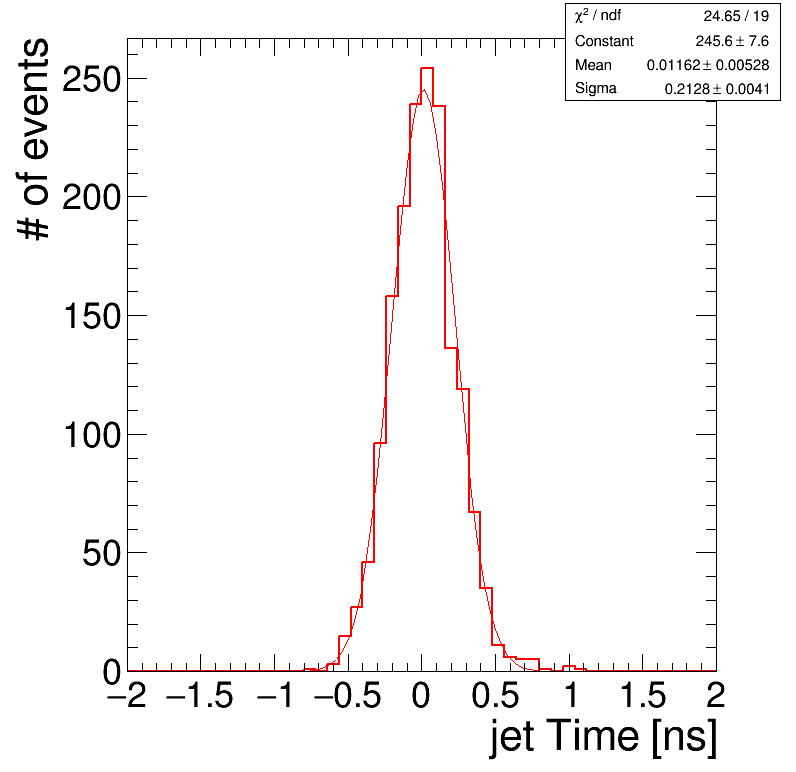

In [32]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
 
    jet_t5 = v['gak4JetNoNuTime_t_60ps'].array()
    jet_eta = v['gak4JetNoNuEta'].array()
    jet_e = v['gak4JetNoNuPt'].array()
    jet_t = v['gak4JetNoNuTime'].array()
    jet_Esum_t = v['gak4JetNoNuEsum_t'].array()
  
    
    basic_string = np.logical_and(jet_t>-666, jet_e>20)
    basic1_string = np.logical_and(abs(jet_eta)<1.4,1)
    basic2_string = np.logical_and(basic_string,basic1_string)
 
    tp1 = jet_t5[basic2_string]
  
    tp = tp1.flatten()

#     SmearTime = np.random.normal(0,1.,len(tp))
#     print('smear time',SmearTime[0],SmearTime[1],SmearTime[2])
#     NewTime = [x+y for x,y in zip(tp, SmearTime)]
#     print('new time',NewTime[0],NewTime[1],NewTime[2])
 
    
#     ht0 = create_TH1D( NewTime, axis_title=['t [ns]', '# of events'], name="", binning=[50,-5,5])
    ht0 = create_TH1D( tp, axis_title=['jet Time [ns]', '# of events'], name="", binning=[50,-2,2])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
#     ht0.Draw('')
    ht0.DrawNormalized('')
    ht0.Fit('gaus')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'jet_time_pt20_60ps.png')
# c.SaveAs(out_dir+'pi0_tof_same_direction.png')


i,j,n,s,m,a
analyzer-ebtp-qcd.root <TTree b'ecalTPTree' at 0x7f7110922be0>
 FCN=18.2645 FROM MIGRAD    STATUS=CONVERGED      60 CALLS          61 TOTAL
                     EDM=5.18517e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.43955e+02   7.44233e+00   1.29004e-02  -2.29832e-05
   2  Mean         1.24216e-02   5.34516e-03   1.14464e-05   5.41149e-02
   3  Sigma        2.15157e-01   3.90492e-03   1.01920e-05  -1.46042e-02


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190918/jet_time_pt20_100ps.png has been created


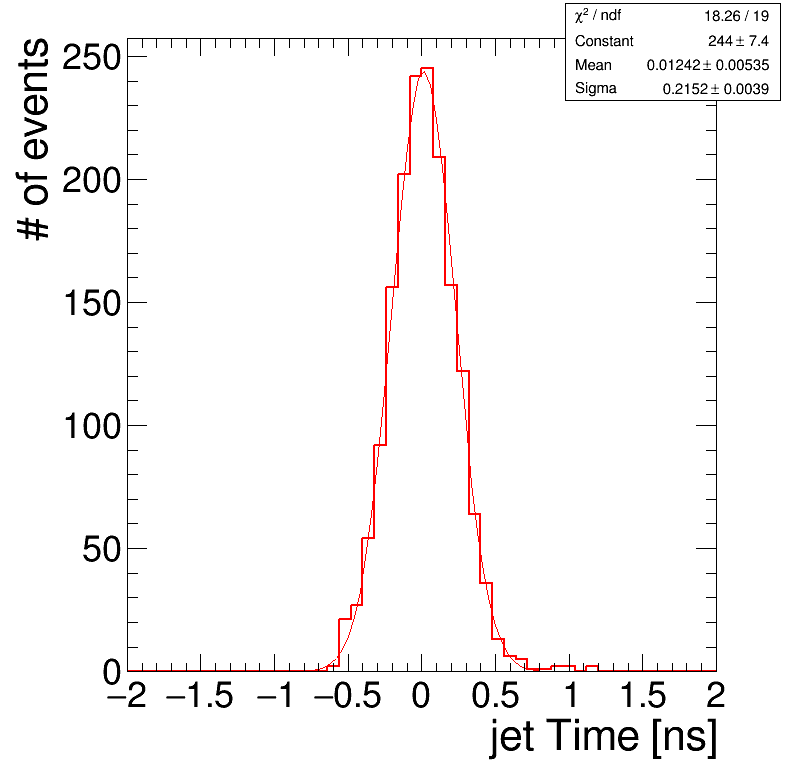

In [33]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
 
    jet_t5 = v['gak4JetNoNuTime_t_100ps'].array()
    jet_eta = v['gak4JetNoNuEta'].array()
    jet_e = v['gak4JetNoNuPt'].array()
    jet_t = v['gak4JetNoNuTime'].array()
    jet_Esum_t = v['gak4JetNoNuEsum_t'].array()
  
    
    basic_string = np.logical_and(jet_t>-666, jet_e>20)
    basic1_string = np.logical_and(abs(jet_eta)<1.4,1)
    basic2_string = np.logical_and(basic_string,basic1_string)
 
    tp1 = jet_t5[basic2_string]
  
    tp = tp1.flatten()

#     SmearTime = np.random.normal(0,1.,len(tp))
#     print('smear time',SmearTime[0],SmearTime[1],SmearTime[2])
#     NewTime = [x+y for x,y in zip(tp, SmearTime)]
#     print('new time',NewTime[0],NewTime[1],NewTime[2])
 
    
#     ht0 = create_TH1D( NewTime, axis_title=['t [ns]', '# of events'], name="", binning=[50,-5,5])
    ht0 = create_TH1D( tp, axis_title=['jet Time [ns]', '# of events'], name="", binning=[50,-2,2])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
#     ht0.Draw('')
    ht0.DrawNormalized('')
    ht0.Fit('gaus')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'jet_time_pt20_100ps.png')
# c.SaveAs(out_dir+'pi0_tof_same_direction.png')


i,j,n,s,m,a
analyzer-ebtp-qcd.root <TTree b'ecalTPTree' at 0x7f7110922be0>
 FCN=16.0539 FROM MIGRAD    STATUS=CONVERGED      60 CALLS          61 TOTAL
                     EDM=1.61467e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.40847e+02   7.52663e+00   1.19746e-02   1.76490e-05
   2  Mean         1.33399e-02   5.41368e-03   1.08711e-05  -4.76576e-02
   3  Sigma        2.18062e-01   4.20650e-03   1.00203e-05  -6.17845e-02


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190918/jet_time_pt20_60ps_func.png has been created


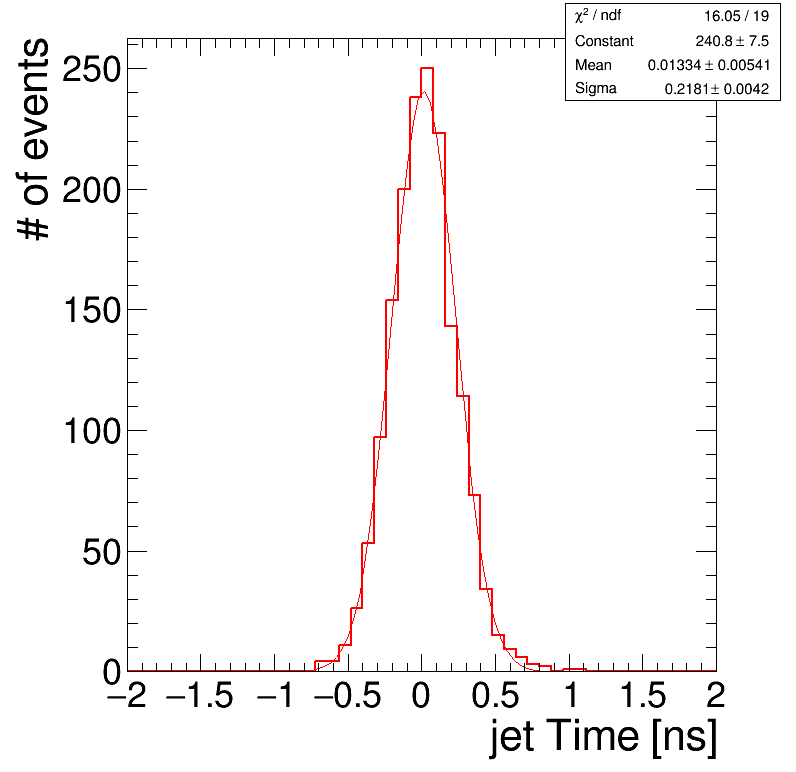

In [34]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
 
    jet_t5 = v['gak4JetNoNuTime_t_60ps_func'].array()
    jet_eta = v['gak4JetNoNuEta'].array()
    jet_e = v['gak4JetNoNuPt'].array()
    jet_t = v['gak4JetNoNuTime'].array()
    jet_Esum_t = v['gak4JetNoNuEsum_t'].array()
  
    
    basic_string = np.logical_and(jet_t>-666, jet_e>20)
    basic1_string = np.logical_and(abs(jet_eta)<1.4,1)
    basic2_string = np.logical_and(basic_string,basic1_string)
 
    tp1 = jet_t5[basic2_string]
  
    tp = tp1.flatten()

#     SmearTime = np.random.normal(0,1.,len(tp))
#     print('smear time',SmearTime[0],SmearTime[1],SmearTime[2])
#     NewTime = [x+y for x,y in zip(tp, SmearTime)]
#     print('new time',NewTime[0],NewTime[1],NewTime[2])
 
    
#     ht0 = create_TH1D( NewTime, axis_title=['t [ns]', '# of events'], name="", binning=[50,-5,5])
    ht0 = create_TH1D( tp, axis_title=['jet Time [ns]', '# of events'], name="", binning=[50,-2,2])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
#     ht0.Draw('')
    ht0.DrawNormalized('')
    ht0.Fit('gaus')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'jet_time_pt20_60ps_func.png')
# c.SaveAs(out_dir+'pi0_tof_same_direction.png')


i,j,n,s,m,a
analyzer-ebtp-qcd.root <TTree b'ecalTPTree' at 0x7f7110922be0>
 FCN=25.1023 FROM MIGRAD    STATUS=CONVERGED      67 CALLS          68 TOTAL
                     EDM=2.4417e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.29505e+02   7.24692e+00   1.41600e-02   2.21595e-07
   2  Mean         1.07588e-02   5.64497e-03   1.40816e-05   1.85625e-03
   3  Sigma        2.27485e-01   4.49454e-03   1.24083e-05  -2.91625e-03


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190918/jet_time_pt20_100ps_func.png has been created


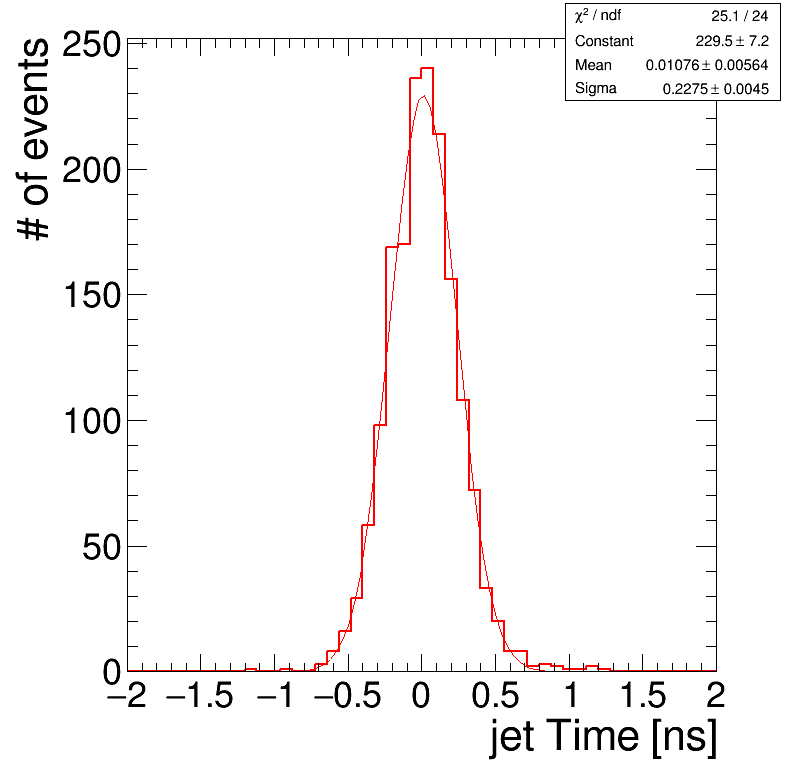

In [35]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
 
    jet_t5 = v['gak4JetNoNuTime_t_100ps_func'].array()
    jet_eta = v['gak4JetNoNuEta'].array()
    jet_e = v['gak4JetNoNuPt'].array()
    jet_t = v['gak4JetNoNuTime'].array()
    jet_Esum_t = v['gak4JetNoNuEsum_t'].array()
  
    
    basic_string = np.logical_and(jet_t>-666, jet_e>20)
    basic1_string = np.logical_and(abs(jet_eta)<1.4,1)
    basic2_string = np.logical_and(basic_string,basic1_string)
 
    tp1 = jet_t5[basic2_string]
  
    tp = tp1.flatten()

#     SmearTime = np.random.normal(0,1.,len(tp))
#     print('smear time',SmearTime[0],SmearTime[1],SmearTime[2])
#     NewTime = [x+y for x,y in zip(tp, SmearTime)]
#     print('new time',NewTime[0],NewTime[1],NewTime[2])
 
    
#     ht0 = create_TH1D( NewTime, axis_title=['t [ns]', '# of events'], name="", binning=[50,-5,5])
    ht0 = create_TH1D( tp, axis_title=['jet Time [ns]', '# of events'], name="", binning=[50,-2,2])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
#     ht0.Draw('')
    ht0.DrawNormalized('')
    ht0.Fit('gaus')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'jet_time_pt20_100ps_func.png')
# c.SaveAs(out_dir+'pi0_tof_same_direction.png')


i,j,n,s,m,a
analyzer-ebtp-qcd.root <TTree b'ecalTPTree' at 0x7f7110922be0>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190918/jet_pt.png has been created


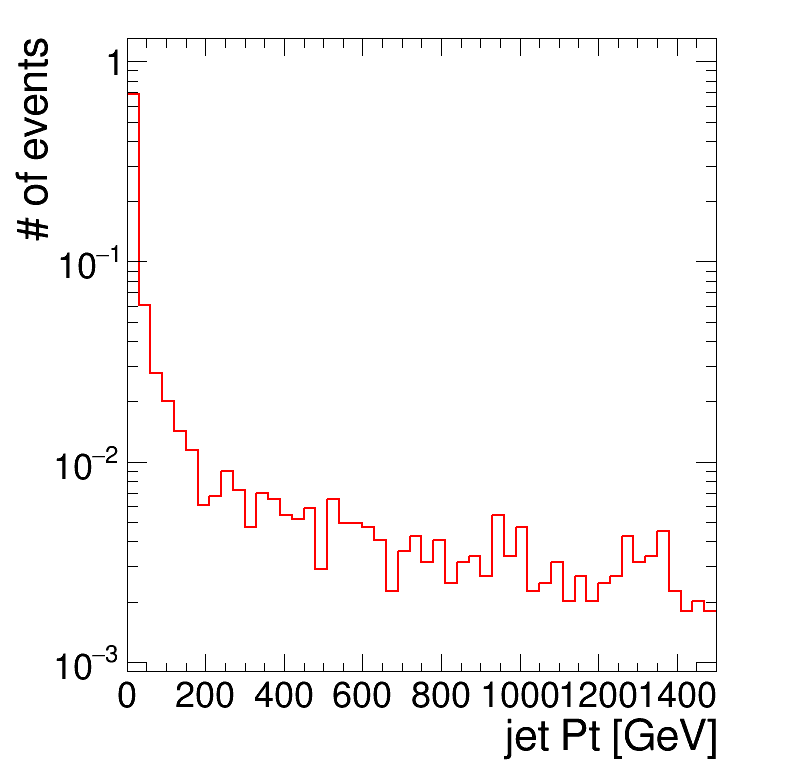

In [36]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
 
    jet_eta = v['gak4JetNoNuEta'].array()
    jet_pt = v['gak4JetNoNuPt'].array()
     
  
    
   
    basic1_string = np.logical_and(abs(jet_eta)<1.4,1)
   
    tp1 = jet_pt[basic1_string]
  
    tp = tp1.flatten()

 
    
#     ht0 = create_TH1D( NewTime, axis_title=['t [ns]', '# of events'], name="", binning=[50,-5,5])
    ht0 = create_TH1D( tp, axis_title=['jet Pt [GeV]', '# of events'], name="", binning=[50,-0, 1500])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
#     ht0.Draw('')
    ht0.DrawNormalized('')
#     ht0.Fit('gaus')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'jet_pt.png')


i,j,n,s,m,a
analyzer-ebtp-qcd.root <TTree b'ecalTPTree' at 0x7f7110922be0>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190918/jet_pt_time_vs_no_time.png has been created


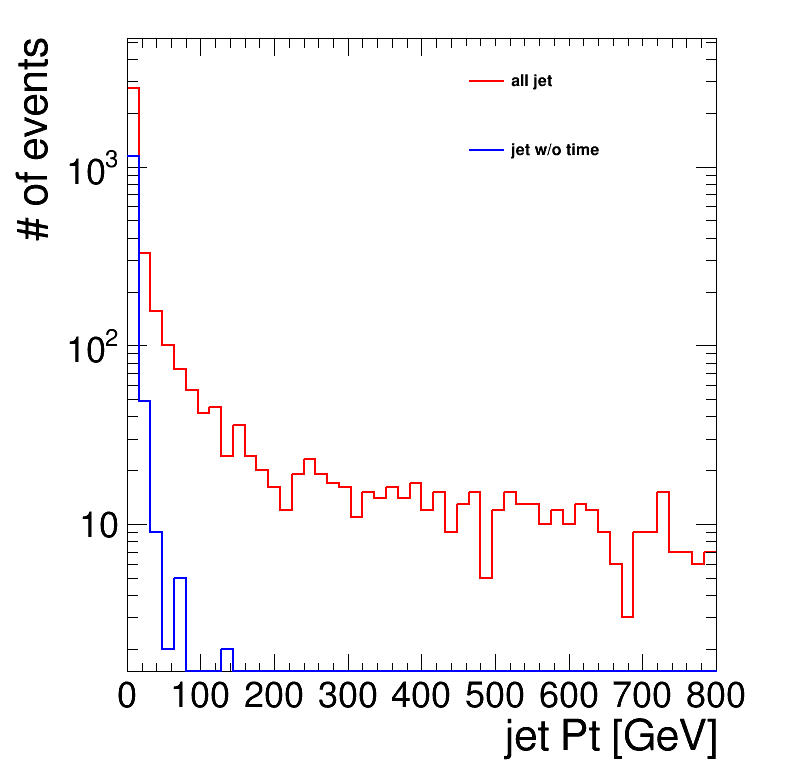

In [37]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.58,0.76,0.83,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
 
    jet_t = v['gak4JetNoNuTime_t'].array()
    jet_Esum = v['gak4JetNoNuEsum'].array()
    jet_Esum_t = v['gak4JetNoNuEsum_t'].array()
    jet_eta = v['gak4JetNoNuEta'].array()
    jet_pt = v['gak4JetNoNuPt'].array()
     
  
    
    basic_string = np.logical_not(jet_t>-100 )
    basic1_string = np.logical_and(abs(jet_eta)<1.4,1)
    basic2_string = np.logical_and(basic_string,basic1_string)
 
    pt1 = jet_pt[basic1_string]
    pt2 = jet_pt[basic2_string]
    esum1 = jet_Esum[basic1_string]
    esum2 = jet_Esum_t[basic1_string]
  
    pt_1 = pt1.flatten()
    pt_2 = pt2.flatten()

    esum_1 = esum1.flatten()
    esum_2 = esum2.flatten()
 
    ht1 = create_TH1D( pt_1, axis_title=['jet Pt [GeV]', '# of events'], name="", binning=[50,0,800])
    ht1.SetLineColor(std_color_list[i+1])
    ht1.SetMarkerColor(std_color_list[i+1])
    
    ht2 = create_TH1D( pt_2, axis_title=['jet Pt [GeV]', '# of events'], name="", binning=[50,0,800])
    ht2.SetLineColor(std_color_list[i+2])
    ht2.SetMarkerColor(std_color_list[i+2])
    
    ht3 = create_TH1D( esum_1, axis_title=['jet Pt [GeV]', '# of events'], name="", binning=[50,0,800])
    ht3.SetLineColor(std_color_list[i+3])
    ht3.SetMarkerColor(std_color_list[i+3])
    
    ht4 = create_TH1D( esum_2, axis_title=['jet Pt [GeV]', '# of events'], name="", binning=[50,0,800])
    ht4.SetLineColor(std_color_list[i+4])
    ht4.SetMarkerColor(std_color_list[i+4])
    
    ht1.Draw('same')
    ht2.Draw('same')
#     ht3.Draw('same')
#     ht4.Draw('same')
    
    leg.AddEntry(ht1, 'all jet')
    leg.AddEntry(ht2, 'jet w/o time')
#     leg.AddEntry(ht3, 'cell energy sum')
#     leg.AddEntry(ht4, 'cell energy sum w/ time')
#     ht0.DrawNormalized('')
#     ht0.Fit('gaus')
 
    i += 1

leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'jet_pt_time_vs_no_time.png')
 

i,j,n,s,m,a
analyzer-ebtp-qcd.root <TTree b'ecalTPTree' at 0x7f7110922be0>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190918/jet_tp_sum_time_vs_no_time.png has been created


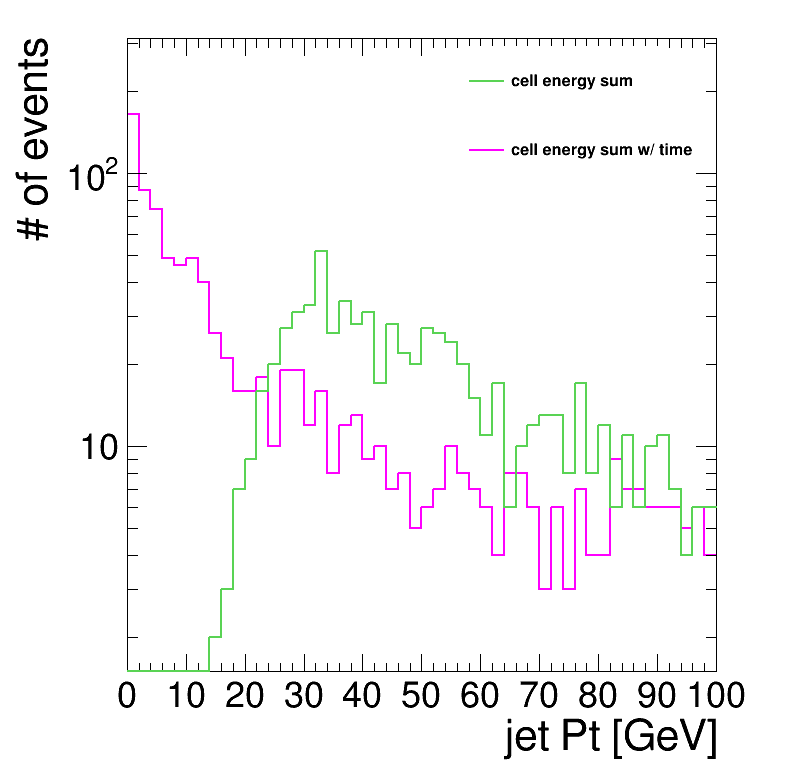

In [38]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.58,0.76,0.83,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
 
    jet_t = v['gak4JetNoNuTime_t'].array()
    jet_Esum = v['gak4JetNoNuEsum'].array()
    jet_Esum_t = v['gak4JetNoNuEsum_t'].array()
    jet_eta = v['gak4JetNoNuEta'].array()
    jet_pt = v['gak4JetNoNuPt'].array()
     
  
    
    basic_string = np.logical_not(jet_t>-100 )
    basic1_string = np.logical_and(abs(jet_eta)<1.4,jet_pt>20)
    basic2_string = np.logical_and(basic_string,basic1_string)
 
    pt1 = jet_pt[basic1_string]
    pt2 = jet_pt[basic2_string]
    esum1 = jet_Esum[basic1_string]
    esum2 = jet_Esum_t[basic1_string]
  
    pt_1 = pt1.flatten()
    pt_2 = pt2.flatten()

    esum_1 = esum1.flatten()
    esum_2 = esum2.flatten()
 
  
    
    ht3 = create_TH1D( esum_1, axis_title=['jet Pt [GeV]', '# of events'], name="", binning=[50,0,100])
    ht3.SetLineColor(std_color_list[i+3])
    ht3.SetMarkerColor(std_color_list[i+3])
    
    ht4 = create_TH1D( esum_2, axis_title=['jet Pt [GeV]', '# of events'], name="", binning=[50,0,100])
    ht4.SetLineColor(std_color_list[i+4])
    ht4.SetMarkerColor(std_color_list[i+4])
    
#     ht1.Draw('same')
#     ht2.Draw('same')
    ht4.Draw('same')
    ht3.Draw('same')
    
#     leg.AddEntry(ht1, 'all jet')
#     leg.AddEntry(ht2, 'jet w/o time')
    leg.AddEntry(ht3, 'cell energy sum')
    leg.AddEntry(ht4, 'cell energy sum w/ time')
#     ht0.DrawNormalized('')
#     ht0.Fit('gaus')
 
    i += 1

leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'jet_tp_sum_time_vs_no_time.png')
 

i,j,n,s,m,a
analyzer-ebtp-qcd.root <TTree b'ecalTPTree' at 0x7f7110922be0>
901.0
460.0
0 1.0
1 0.5105438401775805
2 0.40797546012269936
3 0.2853470437017995
4 0.25862068965517243
5 0.1282051282051282
6 0.1411764705882353
7 0.14864864864864866
8 0.21153846153846154
9 0.0425531914893617
10 0.12195121951219512
11 0.0
12 0.0625
13 0.0
14 0.0
15 0.08333333333333333
16 0.0
17 0.047619047619047616
18 0.09523809523809523
19 0.07142857142857142
20 0.05555555555555555
21 0.0
22 0.0
23 0.0
24 0.0
25 0.0
26 0.0
27 0.0
28 0.0
29 0.0
30 0.0
31 0.0
32 0.0
33 0.14285714285714285
34 0.0
35 0.0
36 0.25
37 0.0
38 0.08333333333333333
39 0.0
40 0.0
41 0.0
42 0.0
43 0.0
44 0.0
45 0.0
46 0.0
47 0.0
48 0.0
49 0.0


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190918/jet_ratio_vs_pt.png has been created


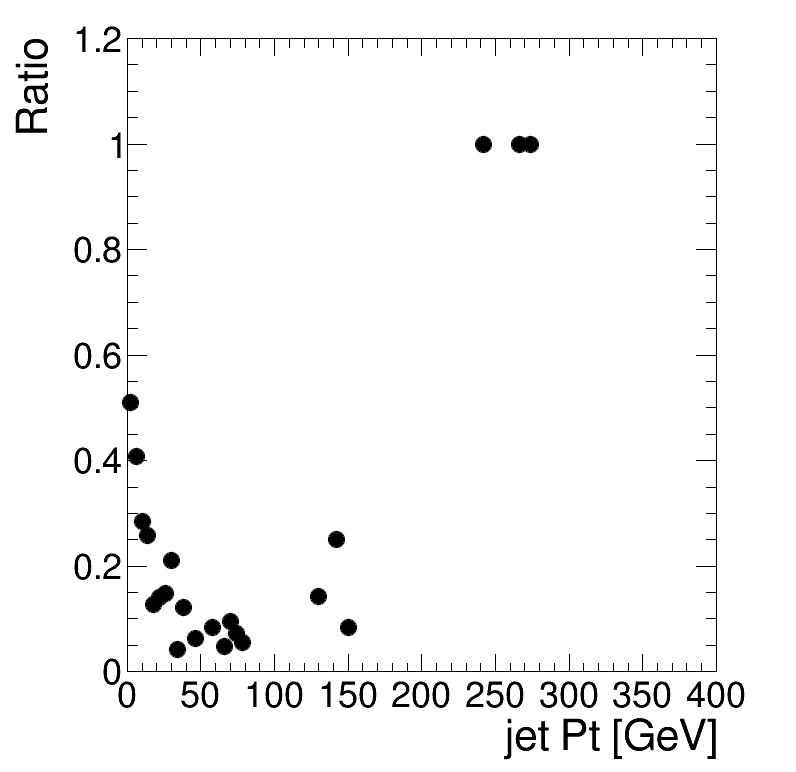

In [39]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.58,0.76,0.83,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
 
    jet_t = v['gak4JetNoNuTime_t'].array()
    jet_eta = v['gak4JetNoNuEta'].array()
    jet_pt = v['gak4JetNoNuPt'].array()
     
  
    
    basic_string = np.logical_not(jet_t>-100 )
    basic1_string = np.logical_and(abs(jet_eta)<1.4,1)
    basic2_string = np.logical_and(basic_string,basic1_string)
 
    pt1 = jet_pt[basic1_string]
    pt2 = jet_pt[basic2_string]
  
    pt_1 = pt1.flatten()
    pt_2 = pt2.flatten()

 
    ht1 = create_TH1D( pt_1, axis_title=['jet Pt [GeV]', '# of events'], name="", binning=[100,0,400])
    ht1.SetLineColor(std_color_list[i+1])
    ht1.SetMarkerColor(std_color_list[i+1])
    
    ht2 = create_TH1D( pt_2, axis_title=['jet Pt [GeV]', '# of events'], name="", binning=[100,0,400])
    ht2.SetLineColor(std_color_list[i+2])
    ht2.SetMarkerColor(std_color_list[i+2])
    
#     ht1.Draw('same')
#     ht2.Draw('same')
    
    print(ht1.GetBinContent(1))
    print(ht2.GetBinContent(1))
    
    leg.AddEntry(ht1, 'all jet')
    leg.AddEntry(ht2, 'jet w/o time')
 
    ht3 = create_TH1D( pt_2, axis_title=['jet Pt [GeV]', 'Ratio'], name="", binning=[100,0,400])
    
    ratio = []
    for bx in range(0,50):
#         print(bx, ht1.GetBinContent(bx), ht2.GetBinContent(bx))
        if ht1.GetBinContent(bx)==0 and ht1.GetBinContent(bx)==0:
            ratio.append(1.0) 
            r = 1.0
        else:
            ratio.append(ht2.GetBinContent(bx)/ht1.GetBinContent(bx))
            r = ht2.GetBinContent(bx)/ht1.GetBinContent(bx)
        
#         print(type(bx),type(r))
        ht3.SetBinContent(bx, r)
        print(bx,r)
        
    
    ratio = np.array(ratio)
    
    ht3.SetLineColor(1)
    ht3.SetMarkerColor(1)
    ht3.SetMarkerSize(2)
    ht3.SetMarkerStyle(20)
    ht3.SetMinimum(0.0)
    ht3.SetMaximum(1.2)
    
    ht3.Draw('psame')
    
    
    
#     ht0.DrawNormalized('')
#     ht0.Fit('gaus')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'jet_ratio_vs_pt.png')
 

i,j,n,s,m,a
analyzer-ebtp-qcd.root <TTree b'ecalTPTree' at 0x7f7110922be0>
17 3
17 3
0.17647058823529413


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190918/jet_pt_time_vs_no_time_ratio.png has been created


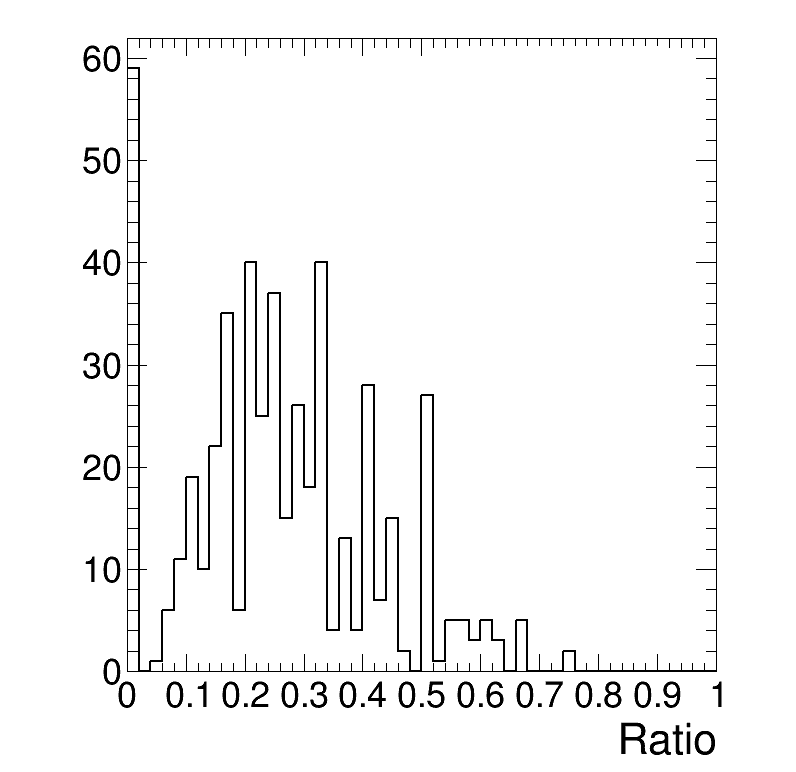

In [40]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.58,0.76,0.83,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
 
    jet_t = v['gak4JetNoNuTime_t'].array()
    jet_eta = v['gak4JetNoNuEta'].array()
    jet_pt = v['gak4JetNoNuPt'].array()
     
  
    
    basic_string = np.logical_not(jet_t>-100 )
    basic1_string = np.logical_and(abs(jet_eta)<1.4,1)
    basic2_string = np.logical_and(basic_string,basic1_string)
 
    pt1 = jet_pt[basic1_string]
    pt2 = jet_pt[basic2_string]
    
    print(len(pt1[0]),len(pt2[0]))
    
    len1 = [len(x) for x in pt1]
    len2 = [len(x) for x in pt2]
    
    print(len1[0],len2[0])
  

    ratio = []
    for i, (x,y) in enumerate(zip(len2, len1)):
        if(y!=0):
            ratio.append(x/y)
        else:
            ratio.append(0)
            if(x>y):
                print('what?')
    
    print(ratio[0])
        
    ratio = np.array(ratio)
    
    ht3 = create_TH1D( ratio, axis_title=['Ratio', ''], name="", binning=[50,0,1])
    ht3.SetLineColor(1)
    ht3.SetMarkerColor(1)
    
    ht3.Draw('same')
    
 
    i += 1

leg.Draw()

# c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'jet_pt_time_vs_no_time_ratio.png')
 

# All jet

i,j,n,s,m,a
analyzer-ebtp-qcd.root <TTree b'ecalTPTree' at 0x7f7110922be0>
[-0.10963868 -0.10469066 -0.18523902  0.11486478  0.01125602  0.05251182
  0.00280199  0.172577    0.24217963  0.1539023 ]
[-0.10963868 -0.10469066 -0.18523902  0.11486478  0.01125602  0.05251182
  0.00280199  0.172577    0.24217963  0.1539023 ]
 FCN=29.8818 FROM MIGRAD    STATUS=CONVERGED      60 CALLS          61 TOTAL
                     EDM=2.49626e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.55507e+02   7.90445e+00   1.68796e-02  -1.95055e-05
   2  Mean         1.48918e-02   5.16018e-03   1.39569e-05  -1.32593e-01
   3  Sigma        2.10801e-01   4.03898e-03   1.32979e-05  -2.86886e-02


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190918/jet_all_time_pt20.png has been created


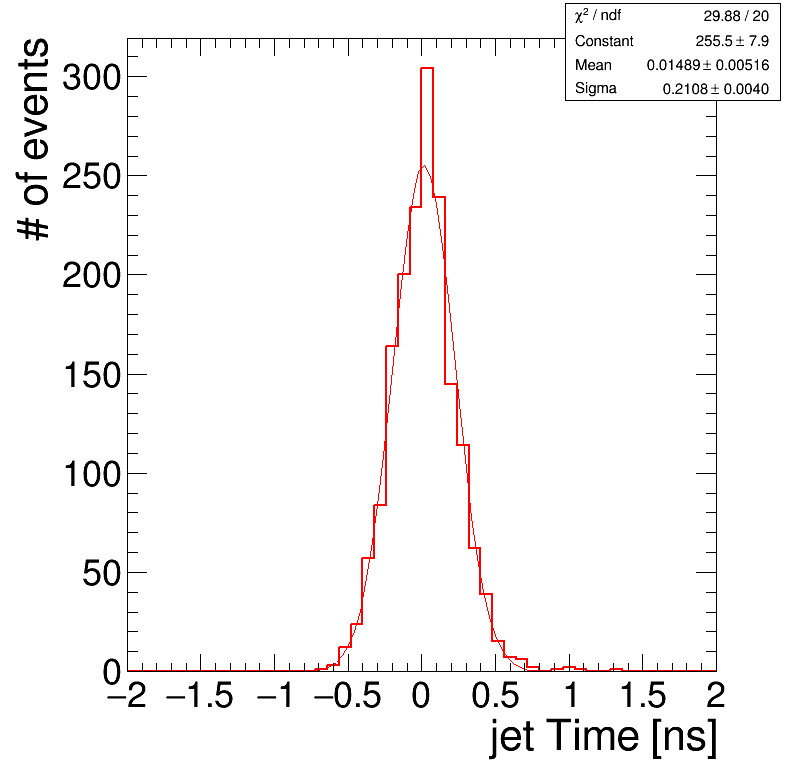

In [41]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
 
    jet_t5 = v['gak4JetNoNuTime_t'].array()
    jet_eta = v['gak4JetNoNuEta'].array()
    jet_e = v['gak4JetNoNuPt'].array()
    jet_t = v['gak4JetNoNuTime'].array()
    jet_Esum_t = v['gak4JetNoNuEsum_t'].array()
  
    
    basic_string = np.logical_and(1, jet_e>20)
    basic1_string = np.logical_and(abs(jet_eta)<1.4,1)
    basic2_string = np.logical_and(basic_string,basic1_string)
 
    tp1 = jet_t5[basic2_string]
  
    tp = tp1.flatten()
    
    print(tp[0:10])
    
    tp_all = np.nan_to_num(tp)
    
    print(tp_all[0:10])
    

#     SmearTime = np.random.normal(0,1.,len(tp))
#     print('smear time',SmearTime[0],SmearTime[1],SmearTime[2])
#     NewTime = [x+y for x,y in zip(tp, SmearTime)]
#     print('new time',NewTime[0],NewTime[1],NewTime[2])
 
    
#     ht0 = create_TH1D( NewTime, axis_title=['t [ns]', '# of events'], name="", binning=[50,-5,5])
    ht0 = create_TH1D( tp_all, axis_title=['jet Time [ns]', '# of events'], name="", binning=[50,-2,2])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
#     ht0.Draw('')
    ht0.DrawNormalized('')
    ht0.Fit('gaus')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'jet_all_time_pt20.png')
# c.SaveAs(out_dir+'pi0_tof_same_direction.png')


i,j,n,s,m,a
analyzer-ebtp-qcd.root <TTree b'ecalTPTree' at 0x7f7110922be0>
[-0.13111682 -0.1134843  -0.11274859  0.01740372  0.01501299  0.01790388
  0.01021722  0.19350211  0.23971929  0.17220828]
[-0.13111682 -0.1134843  -0.11274859  0.01740372  0.01501299  0.01790388
  0.01021722  0.19350211  0.23971929  0.17220828]
 FCN=28.4404 FROM MIGRAD    STATUS=CONVERGED      58 CALLS          59 TOTAL
                     EDM=2.75794e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.51186e+02   7.83837e+00   1.61952e-02  -1.36847e-05
   2  Mean         1.36532e-02   5.24976e-03   1.38665e-05  -4.18997e-02
   3  Sigma        2.14614e-01   4.20822e-03   1.32396e-05  -6.08649e-03


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190918/jet_all_time_pt20_60ps_func.png has been created


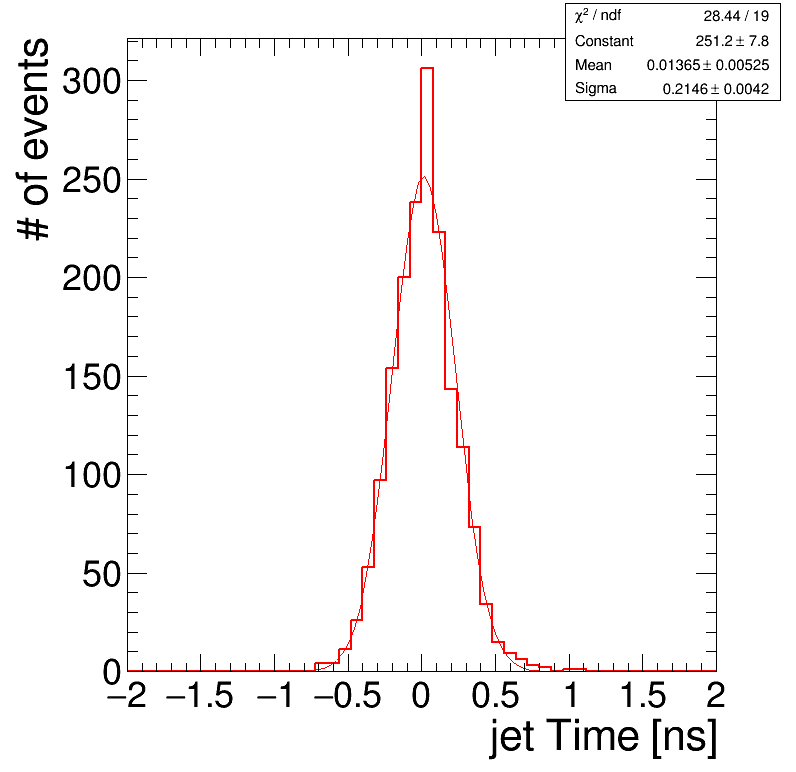

In [42]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
 
    jet_t5 = v['gak4JetNoNuTime_t_60ps_func'].array()
    jet_eta = v['gak4JetNoNuEta'].array()
    jet_e = v['gak4JetNoNuPt'].array()
    jet_t = v['gak4JetNoNuTime'].array()
    jet_Esum_t = v['gak4JetNoNuEsum_t'].array()
  
    
    basic_string = np.logical_and(1, jet_e>20)
    basic1_string = np.logical_and(abs(jet_eta)<1.4,1)
    basic2_string = np.logical_and(basic_string,basic1_string)
 
    tp1 = jet_t5[basic2_string]
  
    tp = tp1.flatten()
    
    print(tp[0:10])
    
    tp_all = np.nan_to_num(tp)
    
    print(tp_all[0:10])
    

#     SmearTime = np.random.normal(0,1.,len(tp))
#     print('smear time',SmearTime[0],SmearTime[1],SmearTime[2])
#     NewTime = [x+y for x,y in zip(tp, SmearTime)]
#     print('new time',NewTime[0],NewTime[1],NewTime[2])
 
    
#     ht0 = create_TH1D( NewTime, axis_title=['t [ns]', '# of events'], name="", binning=[50,-5,5])
    ht0 = create_TH1D( tp_all, axis_title=['jet Time [ns]', '# of events'], name="", binning=[50,-2,2])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
#     ht0.Draw('')
    ht0.DrawNormalized('')
    ht0.Fit('gaus')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'jet_all_time_pt20_60ps_func.png')
# c.SaveAs(out_dir+'pi0_tof_same_direction.png')


i,j,n,s,m,a
analyzer-ebtp-qcd.root <TTree b'ecalTPTree' at 0x7f7110922be0>
[-0.10379718 -0.12776448 -0.07131393  0.03495122  0.01662199  0.04009796
 -0.01346074  0.13206045  0.23751019  0.1185397 ]
[-0.10379718 -0.12776448 -0.07131393  0.03495122  0.01662199  0.04009796
 -0.01346074  0.13206045  0.23751019  0.1185397 ]
 FCN=36.6997 FROM MIGRAD    STATUS=CONVERGED      60 CALLS          61 TOTAL
                     EDM=2.76225e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.56178e+02   7.96282e+00   1.87397e-02  -5.18389e-06
   2  Mean         1.22930e-02   5.12971e-03   1.53842e-05  -1.44491e-01
   3  Sigma        2.09485e-01   4.06443e-03   1.48860e-05   4.13628e-03


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190918/jet_all_time_pt20_60ps.png has been created


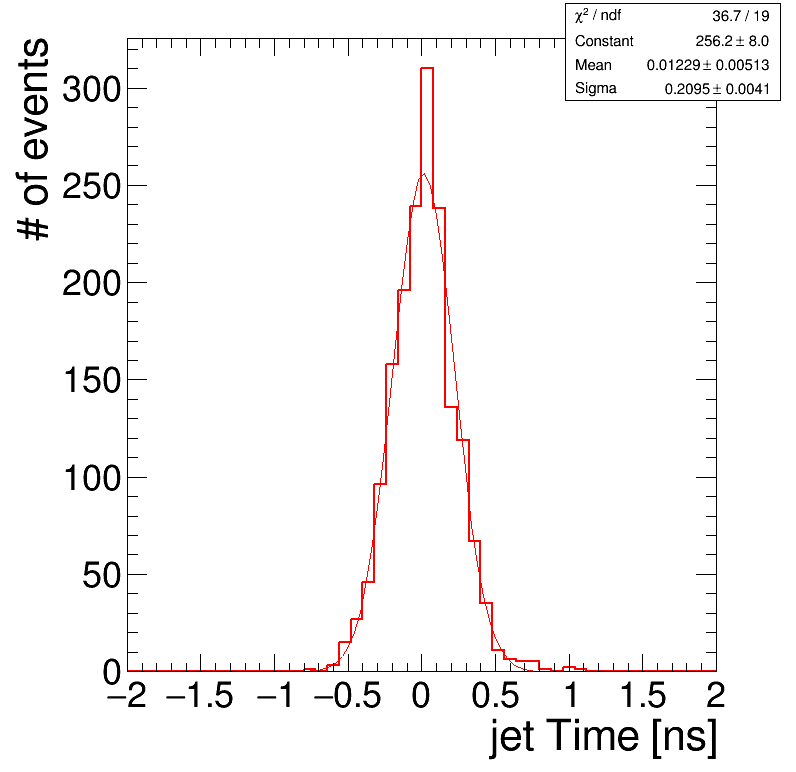

In [43]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
 
    jet_t5 = v['gak4JetNoNuTime_t_60ps'].array()
    jet_eta = v['gak4JetNoNuEta'].array()
    jet_e = v['gak4JetNoNuPt'].array()
    jet_t = v['gak4JetNoNuTime'].array()
    jet_Esum_t = v['gak4JetNoNuEsum_t'].array()
  
    
    basic_string = np.logical_and(1, jet_e>20)
    basic1_string = np.logical_and(abs(jet_eta)<1.4,1)
    basic2_string = np.logical_and(basic_string,basic1_string)
 
    tp1 = jet_t5[basic2_string]
  
    tp = tp1.flatten()
    
    print(tp[0:10])
    
    tp_all = np.nan_to_num(tp)
    
    print(tp_all[0:10])
    

#     SmearTime = np.random.normal(0,1.,len(tp))
#     print('smear time',SmearTime[0],SmearTime[1],SmearTime[2])
#     NewTime = [x+y for x,y in zip(tp, SmearTime)]
#     print('new time',NewTime[0],NewTime[1],NewTime[2])
 
    
#     ht0 = create_TH1D( NewTime, axis_title=['t [ns]', '# of events'], name="", binning=[50,-5,5])
    ht0 = create_TH1D( tp_all, axis_title=['jet Time [ns]', '# of events'], name="", binning=[50,-2,2])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
#     ht0.Draw('')
    ht0.DrawNormalized('')
    ht0.Fit('gaus')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'jet_all_time_pt20_60ps.png')
# c.SaveAs(out_dir+'pi0_tof_same_direction.png')


i,j,n,s,m,a
analyzer-ebtp-qcd.root <TTree b'ecalTPTree' at 0x7f7110922be0>
[-0.12955955 -0.14162076 -0.11905568  0.06796956 -0.0145839   0.0817368
 -0.07196371  0.19217815  0.19485979  0.10981338]
[-0.12955955 -0.14162076 -0.11905568  0.06796956 -0.0145839   0.0817368
 -0.07196371  0.19217815  0.19485979  0.10981338]
 FCN=27.8754 FROM MIGRAD    STATUS=CONVERGED      60 CALLS          61 TOTAL
                     EDM=5.60317e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.54604e+02   7.75434e+00   1.62549e-02   1.17917e-05
   2  Mean         1.30145e-02   5.18558e-03   1.36043e-05  -4.69496e-03
   3  Sigma        2.11943e-01   3.92166e-03   1.25808e-05  -4.50095e-02


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190918/jet_all_time_pt20_100ps.png has been created


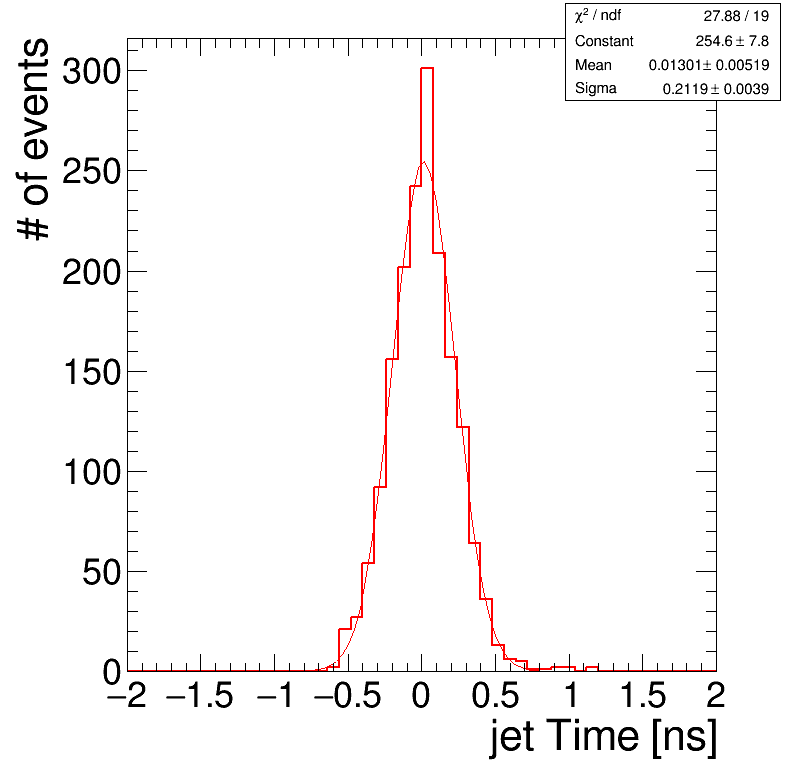

In [44]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
 
    jet_t5 = v['gak4JetNoNuTime_t_100ps'].array()
    jet_eta = v['gak4JetNoNuEta'].array()
    jet_e = v['gak4JetNoNuPt'].array()
    jet_t = v['gak4JetNoNuTime'].array()
    jet_Esum_t = v['gak4JetNoNuEsum_t'].array()
  
    
    basic_string = np.logical_and(1, jet_e>20)
    basic1_string = np.logical_and(abs(jet_eta)<1.4,1)
    basic2_string = np.logical_and(basic_string,basic1_string)
 
    tp1 = jet_t5[basic2_string]
  
    tp = tp1.flatten()
    
    print(tp[0:10])
    
    tp_all = np.nan_to_num(tp)
    
    print(tp_all[0:10])
    

#     SmearTime = np.random.normal(0,1.,len(tp))
#     print('smear time',SmearTime[0],SmearTime[1],SmearTime[2])
#     NewTime = [x+y for x,y in zip(tp, SmearTime)]
#     print('new time',NewTime[0],NewTime[1],NewTime[2])
 
    
#     ht0 = create_TH1D( NewTime, axis_title=['t [ns]', '# of events'], name="", binning=[50,-5,5])
    ht0 = create_TH1D( tp_all, axis_title=['jet Time [ns]', '# of events'], name="", binning=[50,-2,2])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
#     ht0.Draw('')
    ht0.DrawNormalized('')
    ht0.Fit('gaus')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'jet_all_time_pt20_100ps.png')
# c.SaveAs(out_dir+'pi0_tof_same_direction.png')


i,j,n,s,m,a
analyzer-ebtp-qcd.root <TTree b'ecalTPTree' at 0x7f7110922be0>
[-0.13594328 -0.13884546  0.0195605  -0.11919156 -0.03160299  0.02465411
  0.14579578  0.19294538  0.22393131  0.16203387]
[-0.13594328 -0.13884546  0.0195605  -0.11919156 -0.03160299  0.02465411
  0.14579578  0.19294538  0.22393131  0.16203387]
 FCN=38.5109 FROM MIGRAD    STATUS=CONVERGED      60 CALLS          61 TOTAL
                     EDM=9.87271e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.39383e+02   7.55303e+00   1.79396e-02   3.58883e-05
   2  Mean         1.14862e-02   5.47872e-03   1.68250e-05  -1.36182e-01
   3  Sigma        2.23757e-01   4.49617e-03   1.53490e-05  -1.55670e-01


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190918/jet_all_time_pt20_100ps_func.png has been created


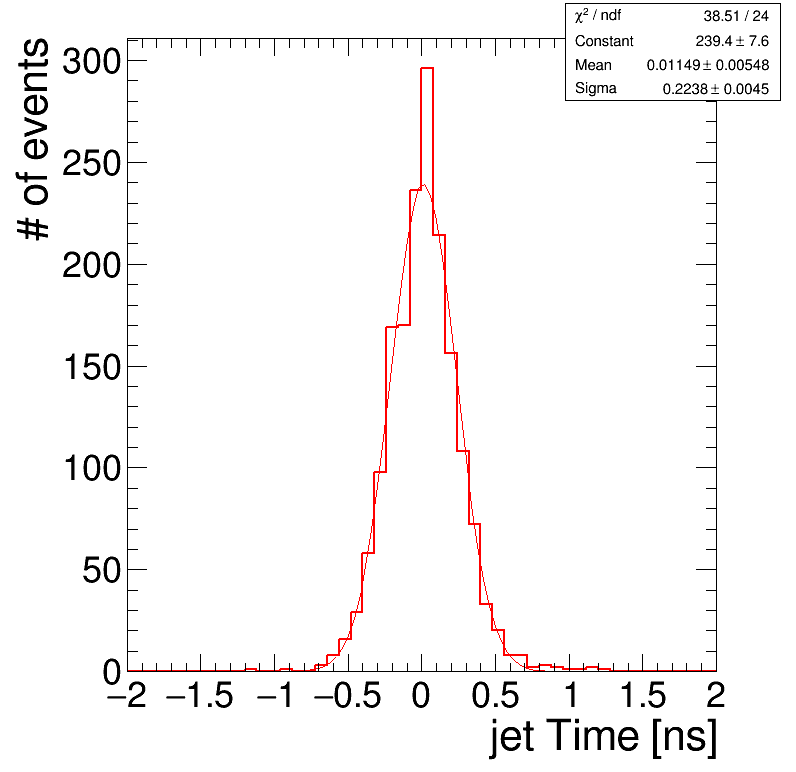

In [45]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
 
    jet_t5 = v['gak4JetNoNuTime_t_100ps_func'].array()
    jet_eta = v['gak4JetNoNuEta'].array()
    jet_e = v['gak4JetNoNuPt'].array()
    jet_t = v['gak4JetNoNuTime'].array()
    jet_Esum_t = v['gak4JetNoNuEsum_t'].array()
  
    
    basic_string = np.logical_and(1, jet_e>20)
    basic1_string = np.logical_and(abs(jet_eta)<1.4,1)
    basic2_string = np.logical_and(basic_string,basic1_string)
 
    tp1 = jet_t5[basic2_string]
  
    tp = tp1.flatten()
    
    print(tp[0:10])
    
    tp_all = np.nan_to_num(tp)
    
    print(tp_all[0:10])
    

#     SmearTime = np.random.normal(0,1.,len(tp))
#     print('smear time',SmearTime[0],SmearTime[1],SmearTime[2])
#     NewTime = [x+y for x,y in zip(tp, SmearTime)]
#     print('new time',NewTime[0],NewTime[1],NewTime[2])
 
    
#     ht0 = create_TH1D( NewTime, axis_title=['t [ns]', '# of events'], name="", binning=[50,-5,5])
    ht0 = create_TH1D( tp_all, axis_title=['jet Time [ns]', '# of events'], name="", binning=[50,-2,2])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
#     ht0.Draw('')
    ht0.DrawNormalized('')
    ht0.Fit('gaus')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'jet_all_time_pt20_100ps_func.png')
# c.SaveAs(out_dir+'pi0_tof_same_direction.png')


i,j,n,s,m,a
analyzer-ebtp-qcd.root <TTree b'ecalTPTree' at 0x7f7110922be0>
[-0.10963868 -0.10469066 -0.18523902  0.11486478  0.01125602  0.05251182
  0.00280199  0.172577    0.24217963  0.1539023 ]
[-0.10963868 -0.10469066 -0.18523902  0.11486478  0.01125602  0.05251182
  0.00280199  0.172577    0.24217963  0.1539023 ]
 FCN=19.6525 FROM MIGRAD    STATUS=CONVERGED      60 CALLS          61 TOTAL
                     EDM=6.11133e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.44681e+02   7.56870e+00   1.34016e-02   2.88043e-06
   2  Mean         1.46075e-02   5.32791e-03   1.17624e-05  -4.43181e-02
   3  Sigma        2.14171e-01   4.01155e-03   1.07622e-05  -1.71011e-01


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190918/jet_real_time_pt20.png has been created


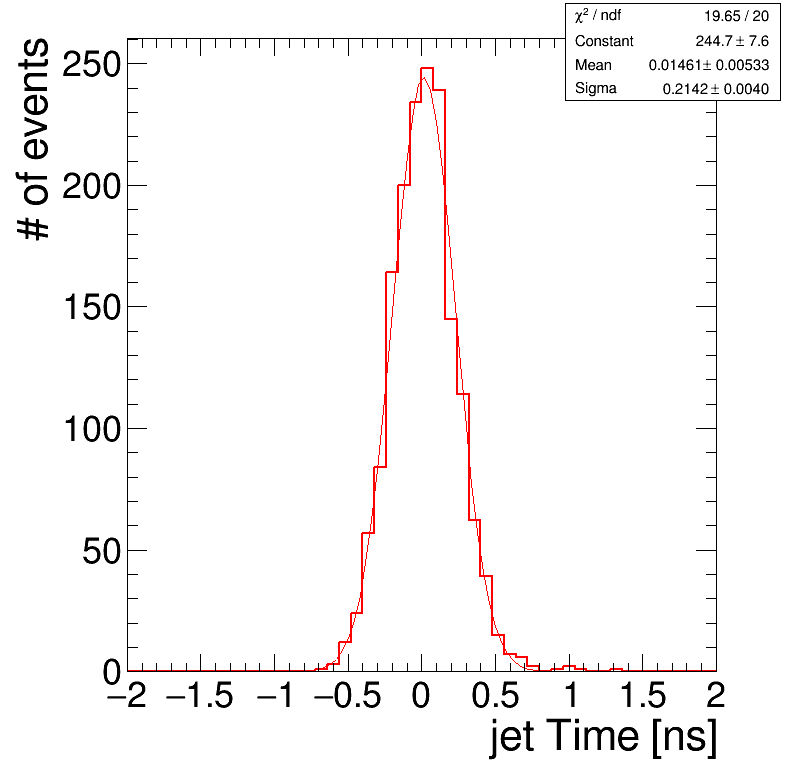

In [46]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
 
    jet_t5 = v['gak4JetNoNuTime_t'].array()
    jet_eta = v['gak4JetNoNuEta'].array()
    jet_e = v['gak4JetNoNuPt'].array()
    jet_t = v['gak4JetNoNuTime'].array()
    jet_Esum_t = v['gak4JetNoNuEsum_t'].array()
  
    
    basic_string = np.logical_and(jet_t5>-666, jet_e>20)
    basic1_string = np.logical_and(abs(jet_eta)<1.4,1)
    basic2_string = np.logical_and(basic_string,basic1_string)
 
    tp1 = jet_t5[basic2_string]
  
    tp = tp1.flatten()
    
    print(tp[0:10])
    
    tp_all = np.nan_to_num(tp)
    
    print(tp_all[0:10])
    

#     SmearTime = np.random.normal(0,1.,len(tp))
#     print('smear time',SmearTime[0],SmearTime[1],SmearTime[2])
#     NewTime = [x+y for x,y in zip(tp, SmearTime)]
#     print('new time',NewTime[0],NewTime[1],NewTime[2])
 
    
#     ht0 = create_TH1D( NewTime, axis_title=['t [ns]', '# of events'], name="", binning=[50,-5,5])
    ht0 = create_TH1D( tp_all, axis_title=['jet Time [ns]', '# of events'], name="", binning=[50,-2,2])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
#     ht0.Draw('')
    ht0.DrawNormalized('')
    ht0.Fit('gaus')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'jet_real_time_pt20.png')
# c.SaveAs(out_dir+'pi0_tof_same_direction.png')


i,j,n,s,m,a
analyzer-ebtp-qcd.root <TTree b'ecalTPTree' at 0x7f1214447160>
[-0.10963868 -0.10469066 -0.18523902  0.01125602  0.05251182  0.00280199
  0.172577    0.24217963  0.1539023   0.22979434]
[-0.10963868 -0.10469066 -0.18523902  0.01125602  0.05251182  0.00280199
  0.172577    0.24217963  0.1539023   0.22979434]
1.0
2.04
1403.0
3.0
467.6666666666667
 FCN=15.3345 FROM MIGRAD    STATUS=CONVERGED      60 CALLS          61 TOTAL
                     EDM=4.38868e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.09878e+02   7.07086e+00   1.11187e-02   9.64731e-06
   2  Mean         1.09056e-02   5.68927e-03   1.12095e-05  -7.18615e-03
   3  Sigma        2.11087e-01   4.31562e-03   1.05272e-05  -3.65215e-02


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20190918/jet_real_time_pt40.png has been created


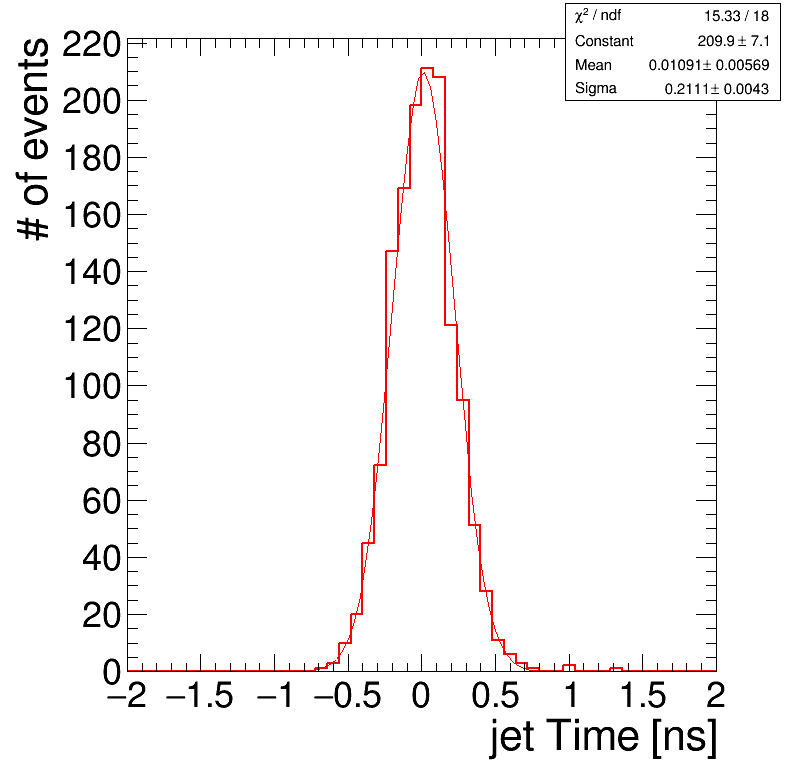

In [4]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
 
    jet_t5 = v['gak4JetNoNuTime_t'].array()
    jet_eta = v['gak4JetNoNuEta'].array()
    jet_e = v['gak4JetNoNuPt'].array()
    jet_t = v['gak4JetNoNuTime'].array()
    jet_Esum_t = v['gak4JetNoNuEsum_t'].array()
  
    
    basic_string = np.logical_and(jet_t5>-666, jet_e>40)
    basic1_string = np.logical_and(abs(jet_eta)<1.4,1)
    basic2_string = np.logical_and(basic_string,basic1_string)
 
    tp1 = jet_t5[basic2_string]
  
    tp = tp1.flatten()
    
    print(tp[0:10])
    
    tp_all = np.nan_to_num(tp)
    
    print(tp_all[0:10])
    

#     SmearTime = np.random.normal(0,1.,len(tp))
#     print('smear time',SmearTime[0],SmearTime[1],SmearTime[2])
#     NewTime = [x+y for x,y in zip(tp, SmearTime)]
#     print('new time',NewTime[0],NewTime[1],NewTime[2])
 
    
#     ht0 = create_TH1D( NewTime, axis_title=['t [ns]', '# of events'], name="", binning=[50,-5,5])
    ht0 = create_TH1D( tp_all, axis_title=['jet Time [ns]', '# of events'], name="", binning=[50,-2,2])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
#     ht0.Draw('')
    ht0.DrawNormalized('')
    ht0.Fit('gaus')
    
    sum1 = ht0.Integral()
    print(ht0.GetBinCenter(38))
    print(ht0.GetBinCenter(51))
    sum2 = ht0.Integral(38, 51)
    print(sum1)
    print(sum2)
    print(sum1/sum2)
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'jet_real_time_pt40.png')
# c.SaveAs(out_dir+'pi0_tof_same_direction.png')


# ratio

i,j,n,s,m,a
analyzer-ebtp-qcd.root <TTree b'ecalTPTree' at 0x7f7110922be0>
901.0
2811.0
0 1.0
1 3.1198668146503885
2 0.20245398773006135
3 0.37532133676092544
4 0.4942528735632184
5 0.5384615384615384
6 0.5058823529411764
7 0.4864864864864865
8 0.6923076923076923
9 0.574468085106383
10 0.6585365853658537
11 0.7142857142857143
12 0.65625
13 0.37142857142857144
14 0.7777777777777778
15 0.6666666666666666
16 0.8
17 0.9047619047619048
18 0.5238095238095238
19 0.6428571428571429
20 0.9444444444444444
21 0.7894736842105263
22 2.0
23 0.8571428571428571
24 0.75
25 1.2727272727272727
26 0.9166666666666666
27 1.6666666666666667
28 0.8
29 0.375
30 0.7777777777777778
31 0.5
32 2.1666666666666665
33 1.4285714285714286
34 0.8571428571428571
35 1.6666666666666667
36 1.75
37 0.875
38 0.3333333333333333
39 2.0
40 0.5555555555555556
41 5.0
42 2.0
43 0.8888888888888888
44 0.625
45 0.8
46 2.0
47 2.25
48 0.6666666666666666
49 3.0


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190918/jet_ratio_vs_pt.png has been created


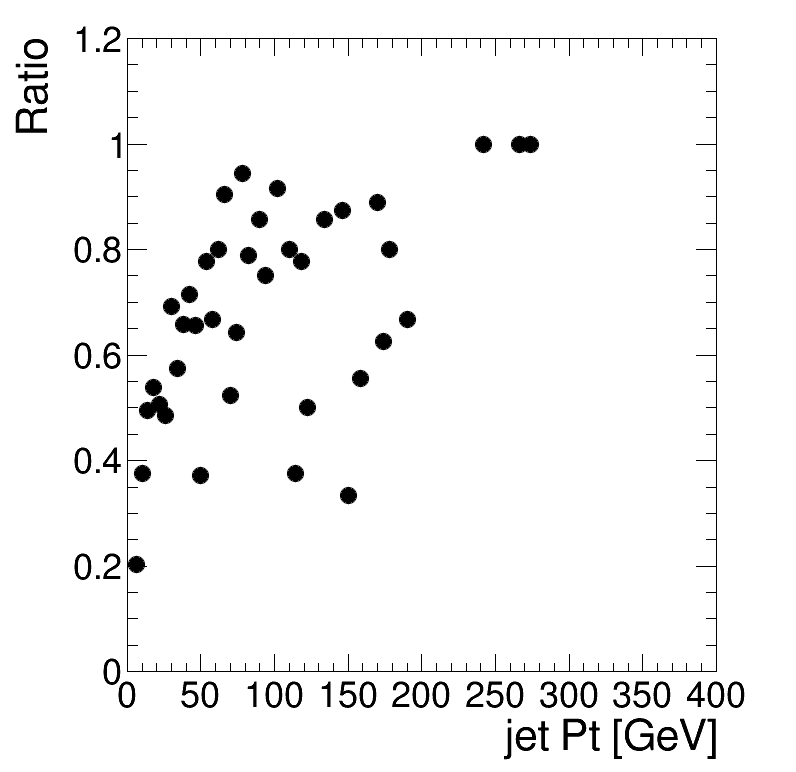

In [47]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.58,0.76,0.83,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
 
    jet_t = v['gak4JetNoNuTime_t'].array()
    jet_eta = v['gak4JetNoNuEta'].array()
    jet_pt = v['gak4JetNoNuPt'].array()
    jet_esum = v['gak4JetNoNuEsum_t'].array()
     
  
    
    basic_string = np.logical_not(jet_t>-100 )
    basic1_string = np.logical_and(abs(jet_eta)<1.4,1)
    basic2_string = np.logical_and(basic_string,basic1_string)
 
    pt1 = jet_pt[basic1_string]
    esum1 = jet_esum[basic1_string]
    pt2 = jet_pt[basic2_string]
  
    pt_1 = pt1.flatten()
    esum_1 = esum1.flatten()
    pt_2 = pt2.flatten()

 
    ht1 = create_TH1D( pt_1, axis_title=['jet Pt [GeV]', '# of events'], name="", binning=[100,0,400])
    ht1.SetLineColor(std_color_list[i+1])
    ht1.SetMarkerColor(std_color_list[i+1])
    
    ht2 = create_TH1D( esum_1, axis_title=['jet Pt [GeV]', '# of events'], name="", binning=[100,0,400])
    ht2.SetLineColor(std_color_list[i+2])
    ht2.SetMarkerColor(std_color_list[i+2])
    
#     ht1.Draw('same')
#     ht2.Draw('same')
    
    print(ht1.GetBinContent(1))
    print(ht2.GetBinContent(1))
    

 
    ht3 = create_TH1D( pt_2, axis_title=['jet Pt [GeV]', 'Ratio'], name="", binning=[100,0,400])
    
    ratio = []
    for bx in range(0,50):
#         print(bx, ht1.GetBinContent(bx), ht2.GetBinContent(bx))
        if ht1.GetBinContent(bx)==0 and ht1.GetBinContent(bx)==0:
            ratio.append(1.0) 
            r = 1.0
        else:
            ratio.append(ht2.GetBinContent(bx)/ht1.GetBinContent(bx))
            r = ht2.GetBinContent(bx)/ht1.GetBinContent(bx)
        
#         print(type(bx),type(r))
        ht3.SetBinContent(bx, r)
        print(bx,r)
        
    
    ratio = np.array(ratio)
    
    ht3.SetLineColor(1)
    ht3.SetMarkerColor(1)
    ht3.SetMarkerSize(2)
    ht3.SetMarkerStyle(20)
    ht3.SetMinimum(0.0)
    ht3.SetMaximum(1.2)
    
    ht3.Draw('psame')
    
    
    
#     ht0.DrawNormalized('')
#     ht0.Fit('gaus')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'jet_ratio_vs_pt.png')
 

i,j,n,s,m,a
analyzer-ebtp-qcd.root <TTree b'ecalTPTree' at 0x7f7110922be0>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190918/jet_ratio.png has been created


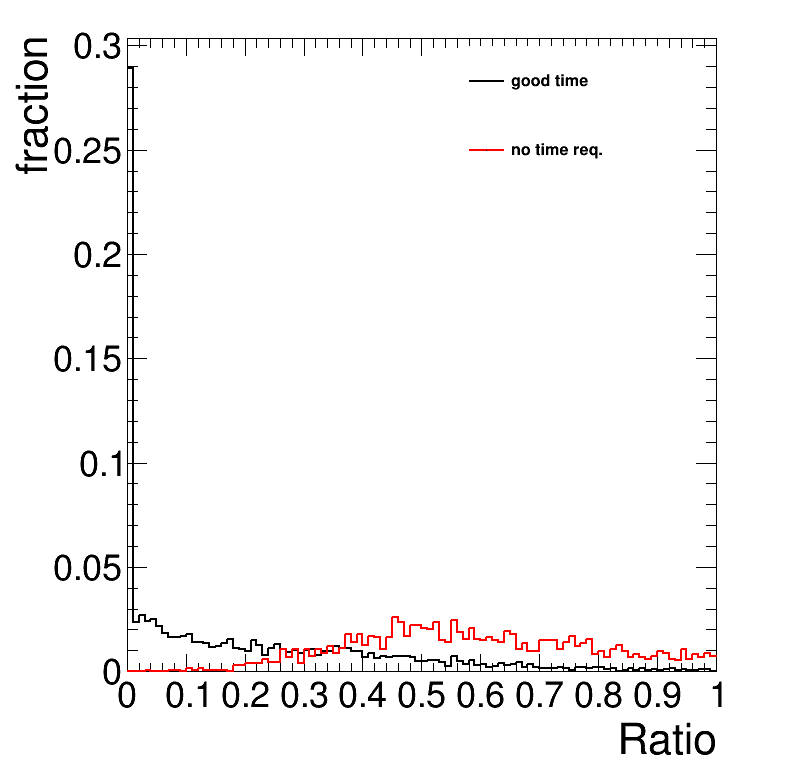

In [48]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.58,0.76,0.83,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
 
    jet_t = v['gak4JetNoNuTime_t'].array()
    jet_eta = v['gak4JetNoNuEta'].array()
    jet_pt = v['gak4JetNoNuPt'].array()
    jet_esum1 = v['gak4JetNoNuEsum_t'].array()
    jet_esum2 = v['gak4JetNoNuEsum'].array()
     
  
    
    basic_string = np.logical_not(jet_t>-100 )
    basic1_string = np.logical_and(abs(jet_eta)<1.4,1)
    basic2_string = np.logical_and(basic_string,basic1_string)
 
    pt1 = jet_pt[basic1_string]
    esum1 = jet_esum1[basic1_string]
    esum2 = jet_esum2[basic1_string]
    pt2 = jet_pt[basic2_string]
  
    pt_1 = pt1.flatten()
    esum_1 = esum1.flatten()
    esum_2 = esum2.flatten()
 
    

 
    ht3 = create_TH1D( esum_1/pt_1, axis_title=['Ratio', 'fraction'], name="", binning=[100,0,1])
    ht3.SetLineColor(1)
    
    
#     ht3.Draw('same')

    ht4 = create_TH1D( esum_2/pt_1, axis_title=['Ratio', 'fraction'], name="", binning=[100,0,1])
    ht4.SetLineColor(2)
    
    
    
    ht3.DrawNormalized('same')
    ht4.DrawNormalized('same')
    
    leg.AddEntry(ht3, 'good time')
    leg.AddEntry(ht4, 'no time req.')
#     ht0.Fit('gaus')
 
    i += 1

leg.Draw()

# c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'jet_ratio.png')
 